### Jupyter notebook that will reproduce Figure 1 from  "Formation of the First Two Black Hole – Neutron Star Mergers (GW200115 and GW200105) from Isolated Binary Evolution" https://arxiv.org/abs/2108.05763

This notebook requires to have the datafiles 


To recreate Figure 1 you will need the following .csv files
 - rates_MSSFR_Models_BHBH_AllDCOsimulation.csv # 22.9 kB
 - rates_MSSFR_Models_BHNS_AllDCOsimulation.csv # 22.9 kB
 - rates_MSSFR_Models_NSNS_AllDCOsimulation.csv # 22.9 kB 
 
these files are available in the directory 
https://github.com/FloorBroekgaarden/NSBH_GW200105_and_GW200115/tree/main/dataFiles/summary_data_Fig_2
The same files are also available in the file csvFilesForFigure2_and_3_DCOpaper.zip from the Zenodo entry  https://zenodo.org/record/5178777


In [1]:
import sys
sys.path.append('../../Scripts') 
from PostProcessingScripts import * # import some custum made scripts that are used to beautify the plots and for some common code. 
import pandas as pd 
import string 


# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
## The code below is just a little hack to get the right headers to read from the CSV rates file for the SFRD models
MSSFRnameslistCSV = ['.0.0.0', '.1.1.1', '.1.1.2', '.1.1.3', '.1.2.1', '.1.2.2', '.1.2.3', '.1.3.1', '.1.3.2', '.1.3.3', '.2.1.1', '.2.1.2', '.2.1.3', '.2.2.1', '.2.2.2', '.2.2.3', '.2.3.1', '.2.3.2', '.2.3.3', '.3.1.1', '.3.1.2', '.3.1.3', '.3.2.1', '.3.2.2', '.3.2.3', '.3.3.1', '.3.3.2', '.3.3.3']

        
        
        

        


In [3]:
def calculateMaxVariations(whichRate='intrinsic', DCO_ind=0, BPSnameslist=BPSnameslist):

    
    Types      = ['BHNS'] #, 'BHNS', 'BHNS']
    TypesLabels  = ['BHNS']#, 'GW200115', 'GW200105']

    
    n=26
    alphabet_ind =  {string.ascii_uppercase[i]: range(n)[i] for i in range(n)}
    existingBPSnameslist_ind = np.vectorize(alphabet_ind.get)(np.asarray(BPSnameslist)) 
    
    
    minMaxMSSFRrates = []
    minMaxBPSrates = []
    meanScatterMSSFRrates = []
    meanScatterBPSrates = []


    
    minMaxMSSFR     = np.zeros((2,len(MSSFRnameslist)))
    percentileMSSFR = np.zeros((3,len(MSSFRnameslist)))
    minMaxBPS       = np.zeros((2,len(existingBPSnameslist_ind)))
    percentileBPS   = np.zeros((3,len(existingBPSnameslist_ind)))
    

        
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        stringgg =  'AllDCOsimulation'
        df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + Types[DCO_ind] + '_' + stringgg +  '.csv' 
        df = pd.read_csv(df_name, index_col=0).T
        rates_L = df[MSSFRnameslistCSV[ind_L]]


        if whichRate =='intrinsic':
            rates = rates_L[::2]


        elif whichRate=='observed':
            rates = rates_L[1::2]

        # over different models
        rates = np.asarray(rates)[existingBPSnameslist_ind]
        
        
        minMaxMSSFR[:,ind_L] = np.asarray([np.min(rates), np.max(rates)])
        percentileMSSFR[:,ind_L] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])

  
        for ind, modelname in enumerate(np.asarray(BPSnameslist)):
            ind_m = existingBPSnameslist_ind[ind]
            
            stringgg =  'AllDCOsimulation'
            df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + Types[DCO_ind]  + '_' + stringgg + '.csv' 
            df = pd.read_csv(df_name, index_col=0)

            if whichRate =='intrinsic':
                namez0 = modelname + ' intrinsic (z=0) [Gpc^{-3} yr^{-1}]'
                rates = df[namez0]
            elif whichRate=='observed':
                nameObs = modelname + ' observed (design LVK) [yr^{-1}]'
                rates = df[nameObs]


            minMaxBPS[:,ind] = np.asarray([np.min(rates), np.max(rates)])
            percentileBPS[:,ind] = np.asarray([np.percentile(a=rates,q=50), np.percentile(a=rates,q=5), np.percentile(a=rates,q=95)])


    return minMaxMSSFR, percentileMSSFR, minMaxBPS, percentileBPS




# Plot figure 1 from the NSBH paper 

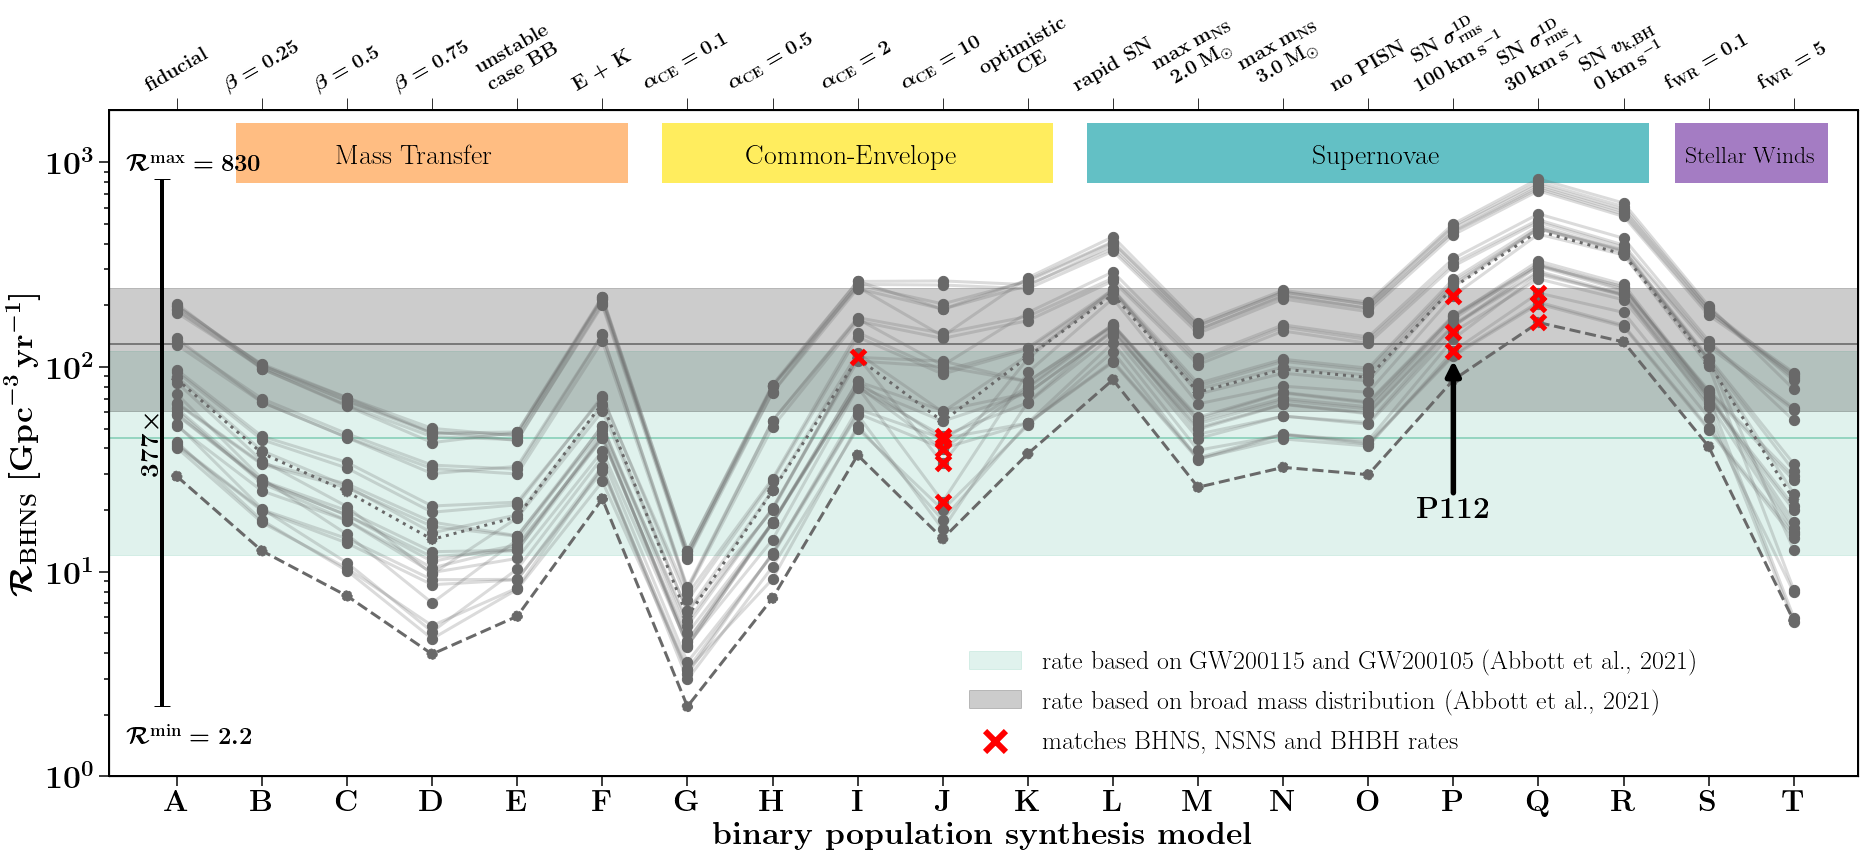

In [4]:
fs = 28  # fontsize 


# BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf
# BHNSrate0 = [12, 242] #  z=0  Gpc-3 yr-1 BBH rate from: https://arxiv.org/pdf/2010.14533.pdf Gpc-3 yr-1 from: GWTC-2-redshift dependent Section 5.3  https://arxiv.org/abs/2010.14533
# # The BBH range is taken from the lowest and highest limits of the four credible intervals for R_BBH given in the paper 

BHNS_event = [45-33, 45, 45+75]  # rate of BHNS merger rate based on GW200115 and GW200105-like mergers  
BHNS_pop = [130-69, 130, 130+112] # rate of BHNS merger rate based on broader population


def plotDCOrates(whichRate='intrinsic', data_dir='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/'):
    """ makes figure 1"""

    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(26,12))
    
    Types      = ['BHNS'] #, 'BHNS', 'BHNS']
    TypesLabels  = ['BHNS']#, 'GW200115', 'GW200105']
    TypeColours = ['dimgray']#,  'lightskyblue', 'orange' ]
    ObservedRatesList = [[12, 242]] #, GW200115, GW200105]
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 
    
    # plot the BHNS (this code is re-used from a code that iterated over multiple rates plotted)
    for ind_t, DCOtype in enumerate(['BHNS']):
        for ind_L, MSSFRname in enumerate(MSSFRnameslist):

            # read in the data using pandas
            df_name = data_dir + 'rates_MSSFR_Models_' + Types[ind_t] + '_' + 'AllDCOsimulation' + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]
            
            
            # choose to plot the local (intrinsic) merger rates, or the detectable rates (for Future LVK)
            if whichRate =='intrinsic':
                rates = rates_L[::2][0:nModels]
                ylabel = r'$\mathcal{R}_{\rm{BHNS}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'

            elif whichRate=='observed':
                rates = rates_L[1::2][0:nModels]
                if ind_L==0:
                    print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


            COLOR=TypeColours[ind_t] 
            # plot highlighted SFRDs
            if MSSFRname=='231':
                zorder=10
                label=None 
                ls = MSSFRlinestyles[1]
                ALPHA=1
                lw=3
            elif MSSFRname=='312':
                COLOR=TypeColours[ind_t]
                zorder=10
                label=None
                ls = MSSFRlinestyles[2]
                ALPHA=1
                lw=3
            else:
                # dim the SFRD models a bit compared to the highlighted SFRD
                zorder=2
                label=None    
                ls = MSSFRlinestyles[0]
                ALPHA=0.24
                lw=3
                
            # plot the rates with scatter points and connected lines 
            axe.plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
            axe.scatter(range(len(rates)), rates, c=COLOR, s=105, label=label, zorder=zorder, alpha=1, linestyle=ls)
            

        ## set some of the axes ranges 
        xmin = -0.8
        xmax = nModels -0.25 # change to len(df.T)

        # calculate statistics:, mostly used to quote the maximum and minumum rates 
        _, _, minMaxPerBPS, _ = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)
        
        
        minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])
        
        if whichRate=='intrinsic':
            textt_min = r'$\mathcal{R}^{\rm{min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}^{\rm{max}} = %s $'%roundAndFormat(maxx)
        elif whichRate=='observed':
            textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
            textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
        xloc_text = 0.6502
                

        ## MAKE RANGE ERROR LINE on the left: 
        resN = 20
        scatterline_x = -0.25 * np.ones(resN)
        scatterline_y = np.linspace(minn,maxx, resN)
        axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=8, ecolor='k', elinewidth=4)
        textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
        yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
        axe.text(-0.19, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-2, color='k', ha='right', va='center')

        # add text with the min and max predicted rates below and on top of the error bar 
        axe.text(-0.6, minn*0.8, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
        axe.text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')
                
        
        # add the inferred LIGO-Virgo rates with bars in the background
        xx = np.linspace(xmin,xmax,15)
        # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
        if whichRate=='intrinsic':
            min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
            max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
            
            # event based rate
            axe.fill_between(xx, np.ones_like(xx)*BHNS_event[0], np.ones_like(xx)*BHNS_event[2], alpha=0.2, color='#66c2a5', zorder=1) 
            axe.plot(xx, np.ones_like(xx)*BHNS_event[1], lw=2.0, alpha=0.6, color='#66c2a5', zorder=1)
            # broader population based rate 
            axe.fill_between(xx, np.ones_like(xx)*BHNS_pop[0], np.ones_like(xx)*BHNS_pop[2], alpha=0.2, color='k', zorder=1)
            axe.plot(xx, np.ones_like(xx)*BHNS_pop[1], lw=2.0, alpha=0.4, color='k', zorder=1)
        
        # if we are plotting the detectable rates, add some lines for guidance
        else:
            for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

        # make up axes
        xlabel = r'\textbf{binary population synthesis model}'
        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=32)
        axe.set_yscale('log')
    
        # Set the tick labels
        axe.set_xticks(range(nModels))
        axe.set_xticklabels(BPSnameslist)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
        

        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)      

    
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        axe.set_xticks(range(nModels))
        axe.set_xticklabels(physicalnames,  fontsize=fs+2) #rotation=55,
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


    
    #############################################################################
    #############################################################################
    
    
#     # the following block marks the simulations where all 3 DCO flavors are consistent with LIGO Virgo 90% credible intervals with a red cross.      
    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        
        NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533
        BHBHrate0 = [10.3, 104] #for minimum and maximum of possible local merger rates estimates, 
        BHNSrate0 = [12, 242]

        Types      = ['BBH', 'BHNS', 'BNS']
        TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
        TypeColours = ['#8da0cb','#66c2a5','#fc8d62']
        
        ######### RATES 
        ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
        for ind_t, DCOtype in enumerate(Types):
            df_name = data_dir + 'rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + 'AllDCOsimulation' + '.csv' 
            df = pd.read_csv(df_name, index_col=0).T
            rates_L = df[MSSFRnameslistCSV[ind_L]]

            if whichRate =='intrinsic':
                rates2 = rates_L[::2][0:nModels]
            elif whichRate=='observed':
                rates2 = rates_L[1::2][0:nModels]

            if ind_t==0:
                rate_BHBH2 = rates2
            elif ind_t==1:
                rate_BHNS2 = rates2
            elif ind_t==2:
                rate_NSNS2 = rates2

        maskBHBH = (rate_BHBH2>= BHBHrate0[0]) & (rate_BHBH2 <=BHBHrate0[1])
        maskBHNS = (rate_BHNS2>= ObservedRatesList[1][0]) & (rate_BHNS2 <=ObservedRatesList[1][1])
        maskNSNS = (rate_NSNS2>= ObservedRatesList[2][0]) & (rate_NSNS2 <=ObservedRatesList[2][1])

        maskGWTC2_DCO = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 
        
        super_mask = (maskGWTC2_DCO==1)  # rates match all 3 DCO inferred merger rate densities from LIGO-Virgo-KAGRA 
        axe.scatter((np.array(range(len(rates))))[super_mask], rate_BHNS2[super_mask], c='r', marker='x', zorder=1E9, linewidth=5, s=200)
        
        
    ################################################################
    ################################################################
    ################################################################
    
  
    # legend top panel
    xx = np.linspace(-100, -98, 2)
    axe.fill_between(xx, np.ones_like(xx)*BHNS_event[0], np.ones_like(xx)*BHNS_event[2],\
                        alpha=0.2, color='#66c2a5', zorder=1, label='rate based on GW200115 and GW200105 (Abbott et al., 2021)')  
    axe.fill_between(xx, np.ones_like(xx)*BHNS_pop[0],   np.ones_like(xx)*BHNS_pop[2],\
                        alpha=0.2, color='k', zorder=1, label='rate based on broad mass distribution (Abbott et al., 2021)')
    axe.legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.0001), frameon=False)
        
    # legend bottom 
    axe.scatter([-100], [1],  s=435, c='r', marker='x', linewidth=6, label='matches BHNS, NSNS and BHBH rates' )
    axe.legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.000), frameon=False)
    
            
    # cool label plotting in top of the panel with the stellar evolution prescriptions change; adopted from Tom Wagg's LISA paper:  
    offset = 0.3
    for lower, upper, color, label, lc, lfs in [(1, 5, "#FF9739", "Mass Transfer", "#9B5A07", fs), (6, 10, "#FFE300", "Common-Envelope", "#C3A900", fs),
                                       (11, 17, "#089CA3", "Supernovae", "#08684E", fs), (17.9, 19.1, "#7030A0", "Stellar Winds", "#002060", 0.85*fs)]:
        axe.axvspan(lower - offset, upper + offset, 0.89, 0.98, color="white", linewidth=0, zorder=1)
        axe.axvspan(lower - offset, upper + offset, 0.89, 0.98, color=color, alpha=0.63, linewidth=0, zorder=1)
        if label=="Stellar Winds":
            axe.annotate(label, xy=(((upper - lower) / 2 + 0.28 + lower) / 20, 0.93), xycoords="axes fraction", ha="center", va="center", color='k', fontsize=lfs, fontname="Avenir", zorder=12)
        else:
            axe.annotate(label, xy=(((upper - lower) / 2 + 0.5 + lower) / 20, 0.93), xycoords="axes fraction", ha="center", va="center", color='k', fontsize=lfs, fontname="Avenir", zorder=12)
               
    #### make black Arrow pointing to model P112 ##########
    # properties  arrow 
    strr = r"\textbf{P112} "
    x_xy, y_xy = 15, 110.
    x_xytext, y_xytext = 15, 20.
    conn = "arc3,rad=+0.0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=30, va="center", ha="center",
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", lw=5.5), zorder=200000)            
            
            
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.06)#2)
    plt.savefig('./Rates_' +whichRate + '_single_panel.png', dpi=300, transparent=False)#,\
    plt.savefig('./Rates_' +whichRate + '_single_panel.pdf')#,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()
    
    
    return





ylims =[[1,1800]]
plotDCOrates(whichRate='intrinsic', data_dir='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/')




# Extra plots: Fig 1 but seperately per SFRD: 

the intrinsic fiducial rate for  BHNS = 43.022776513041364
20 nModels


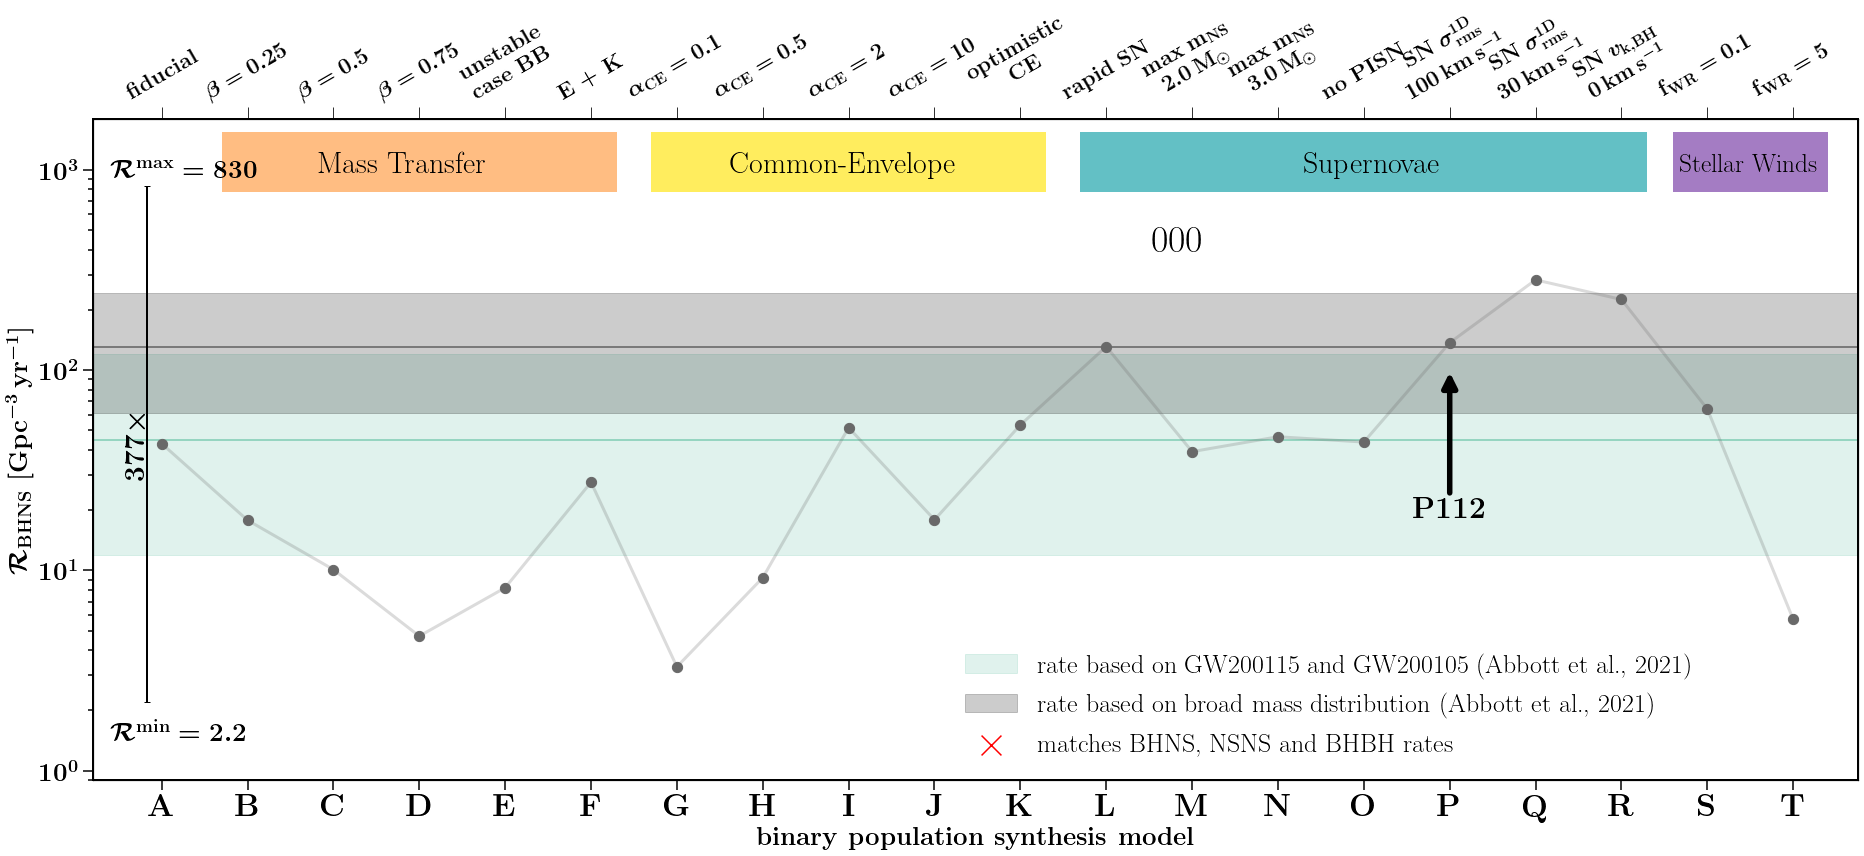

20 nModels


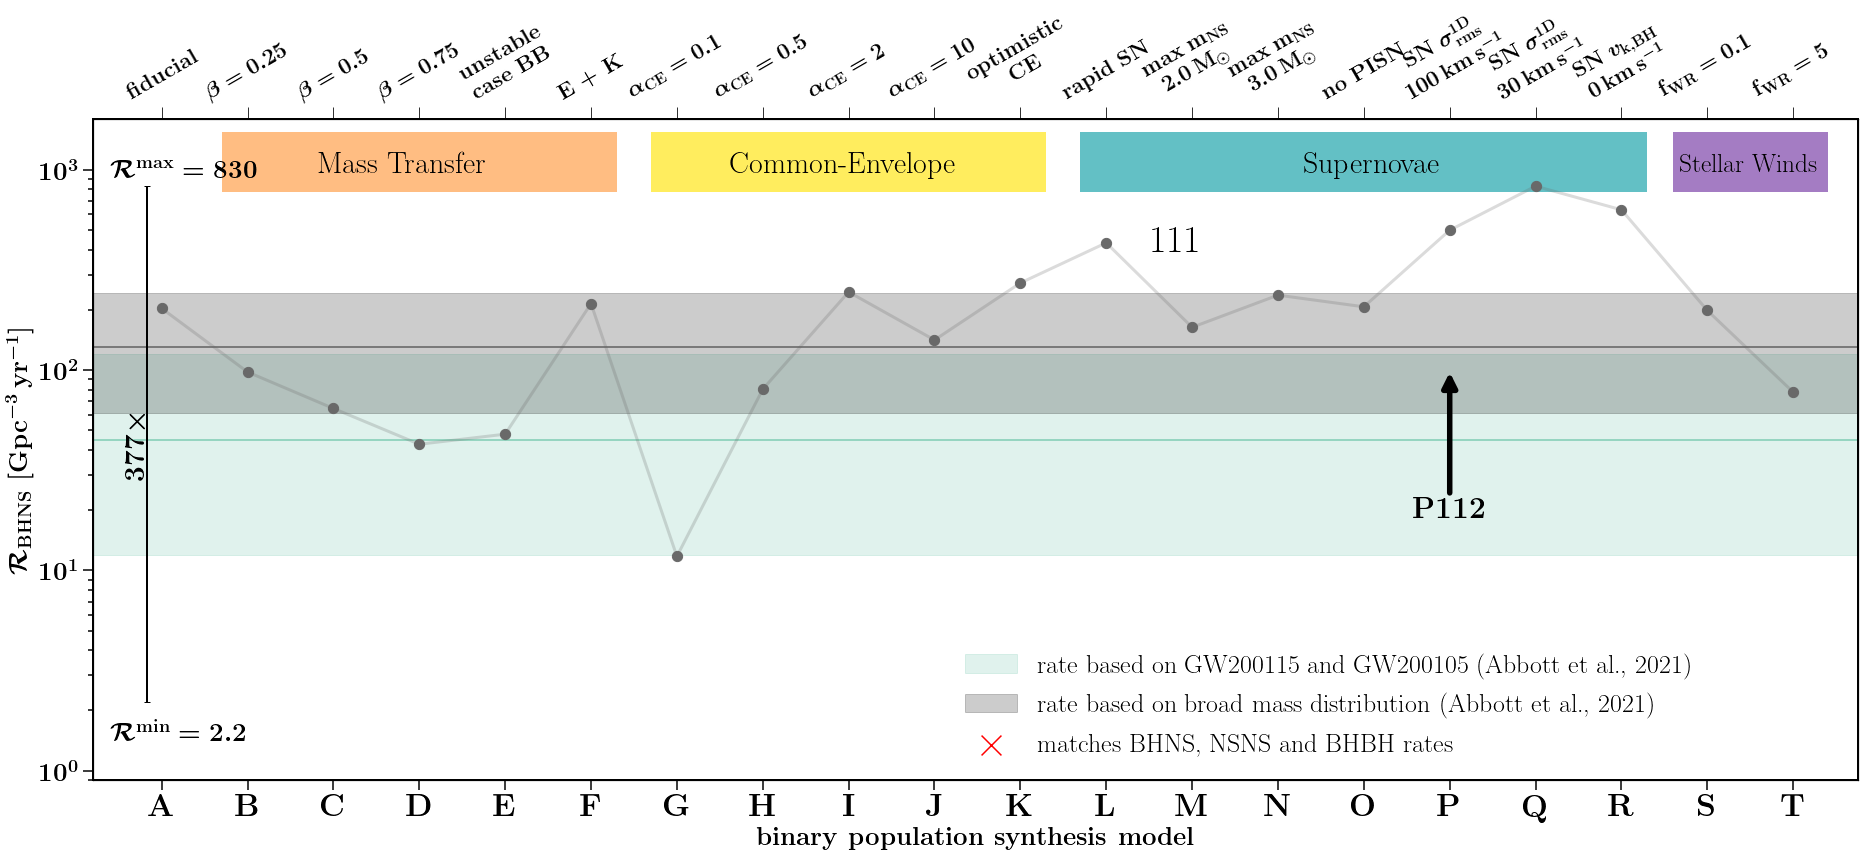

20 nModels


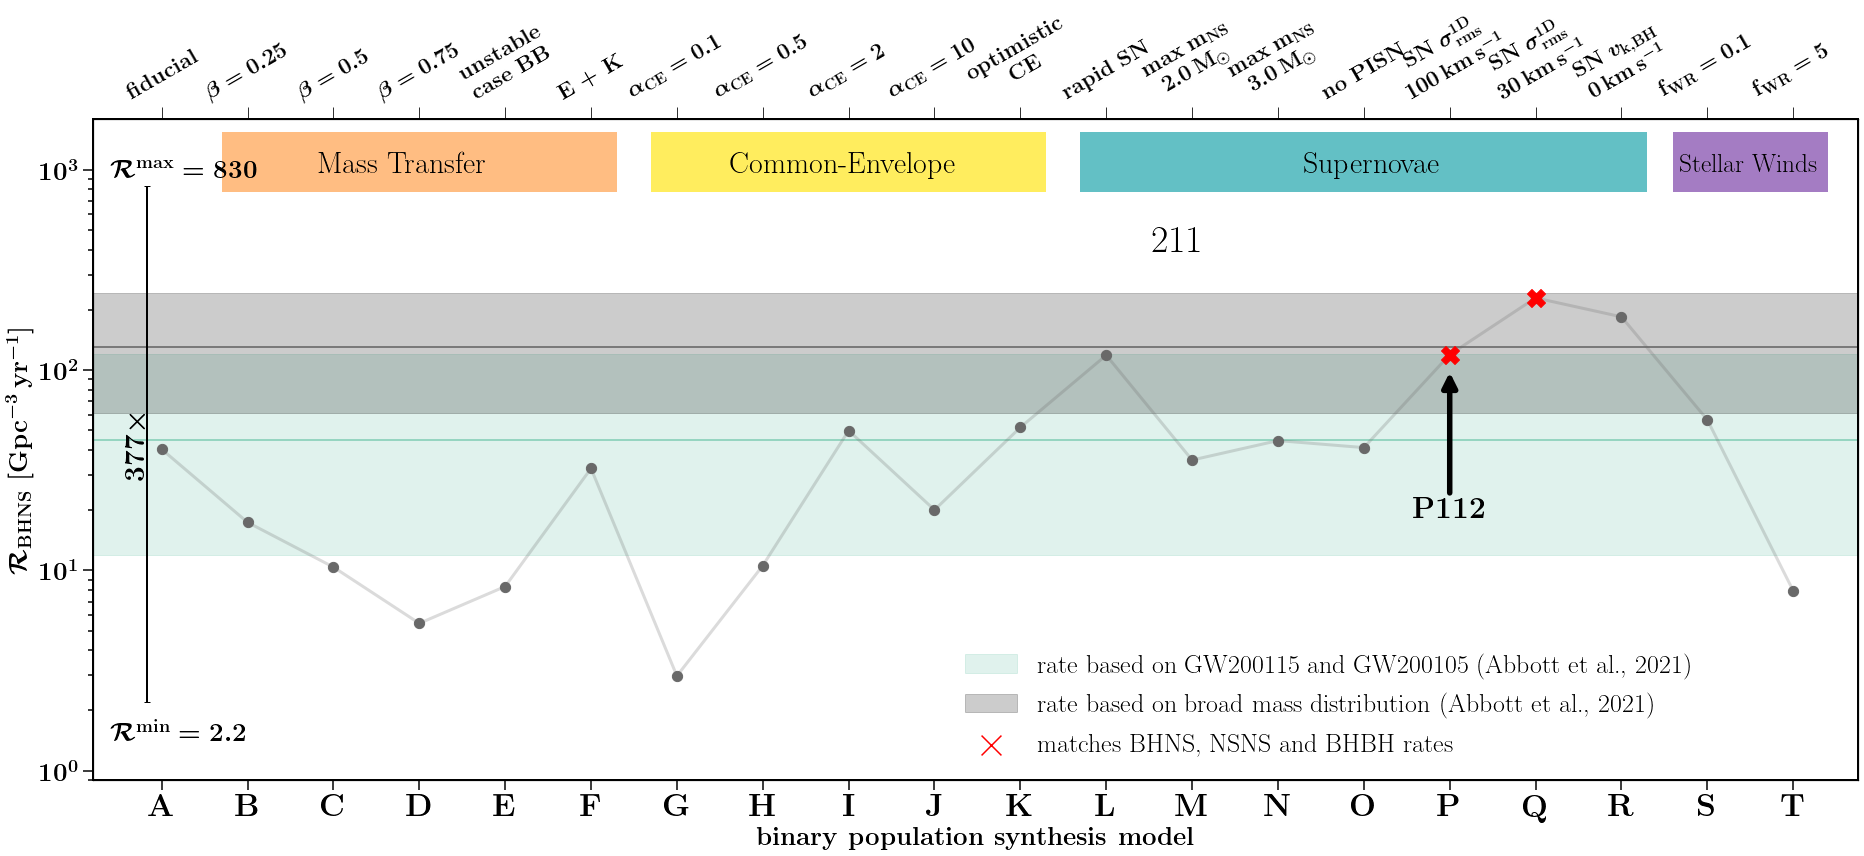

20 nModels


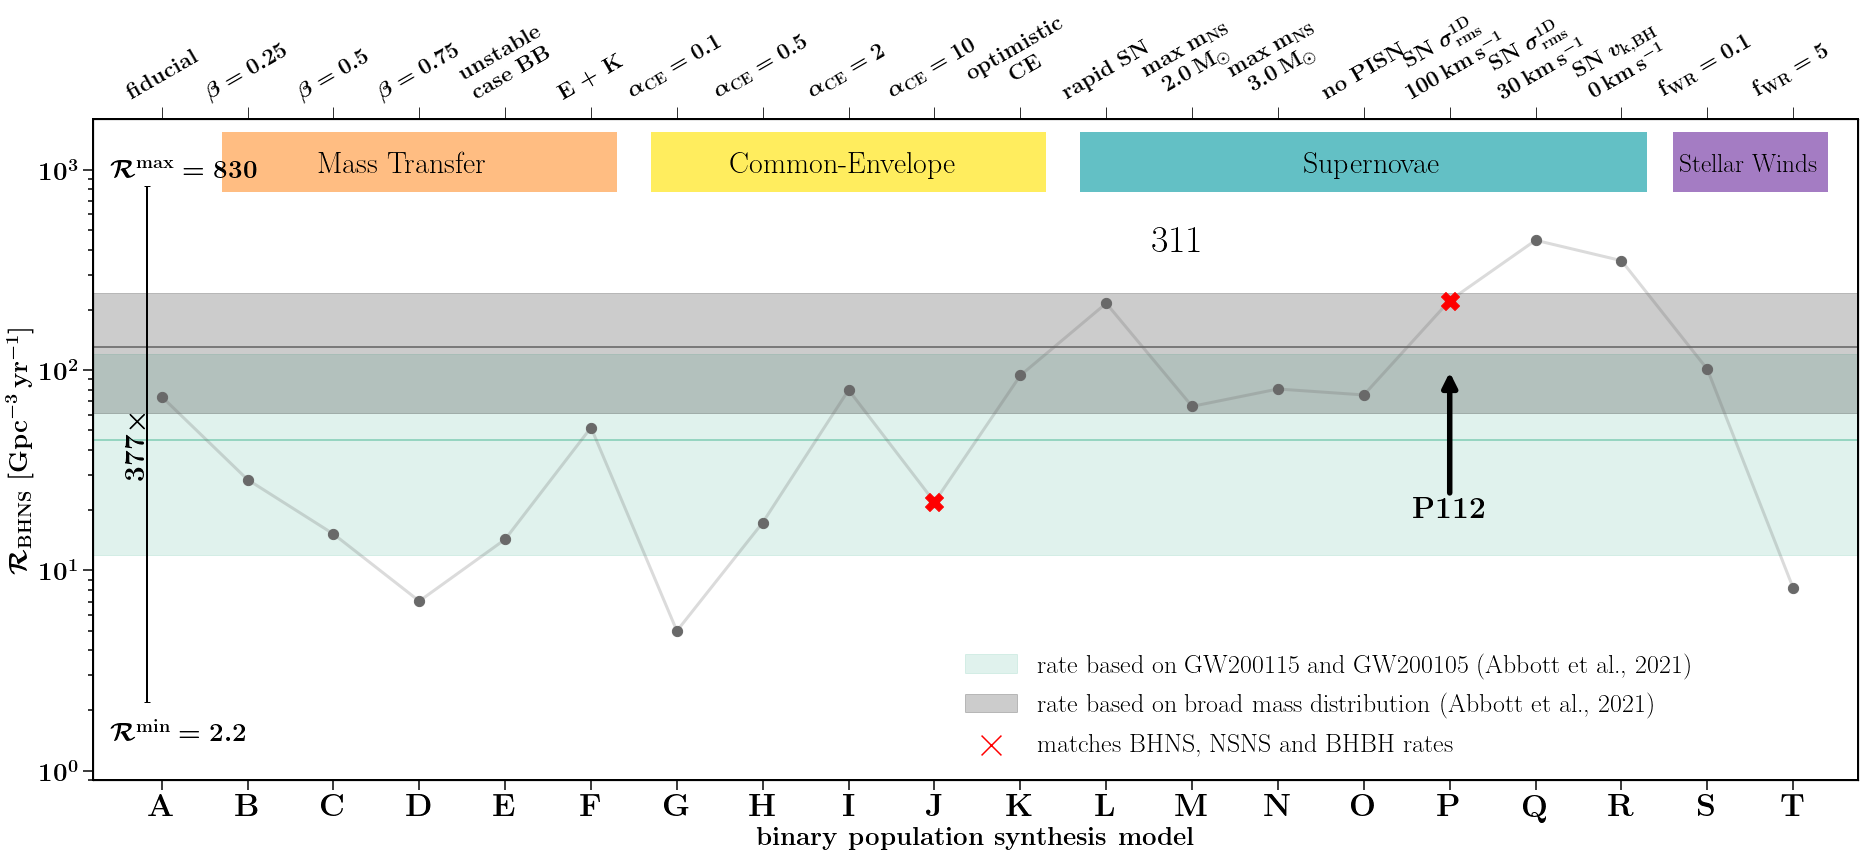

20 nModels


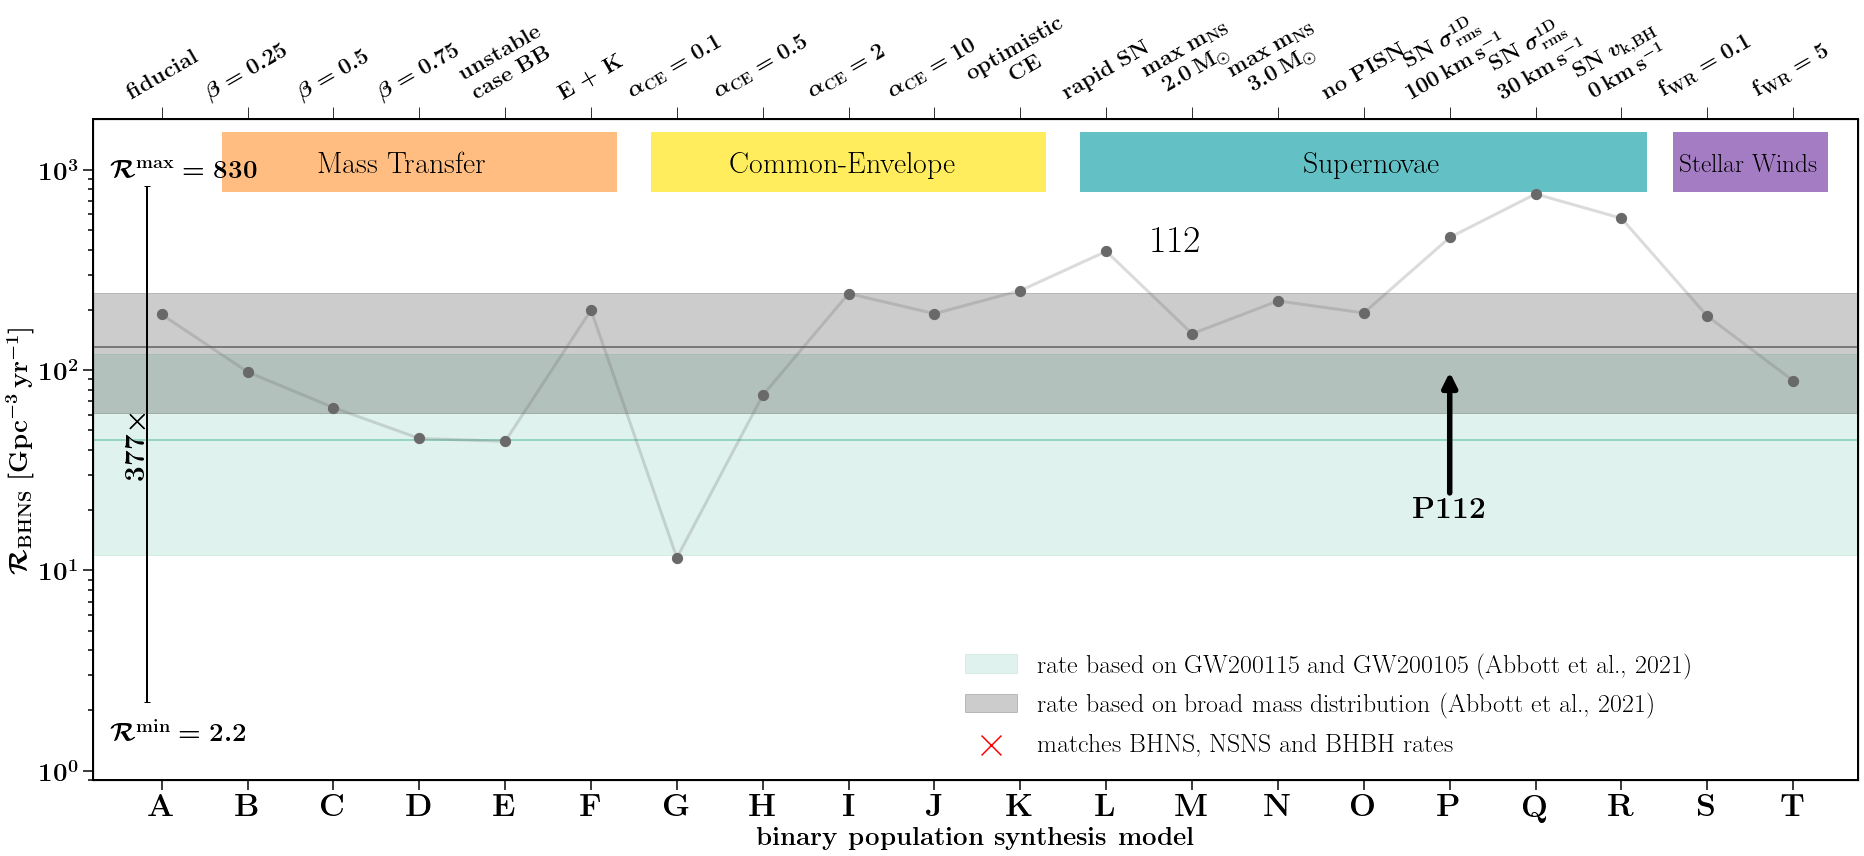

20 nModels


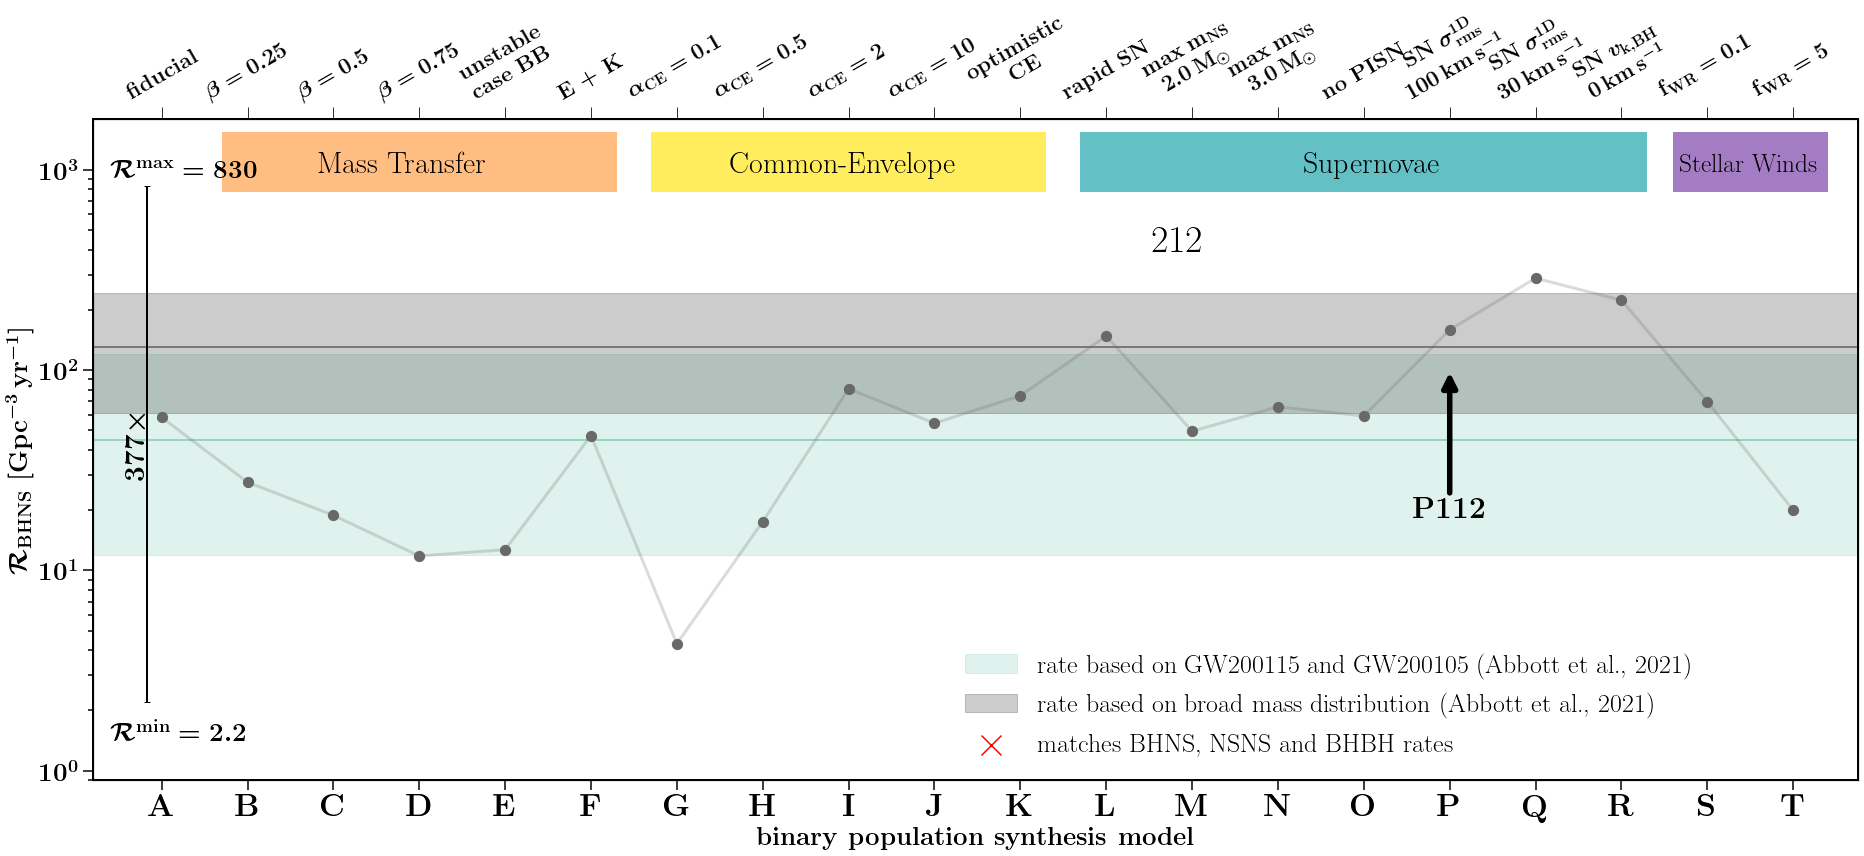

20 nModels


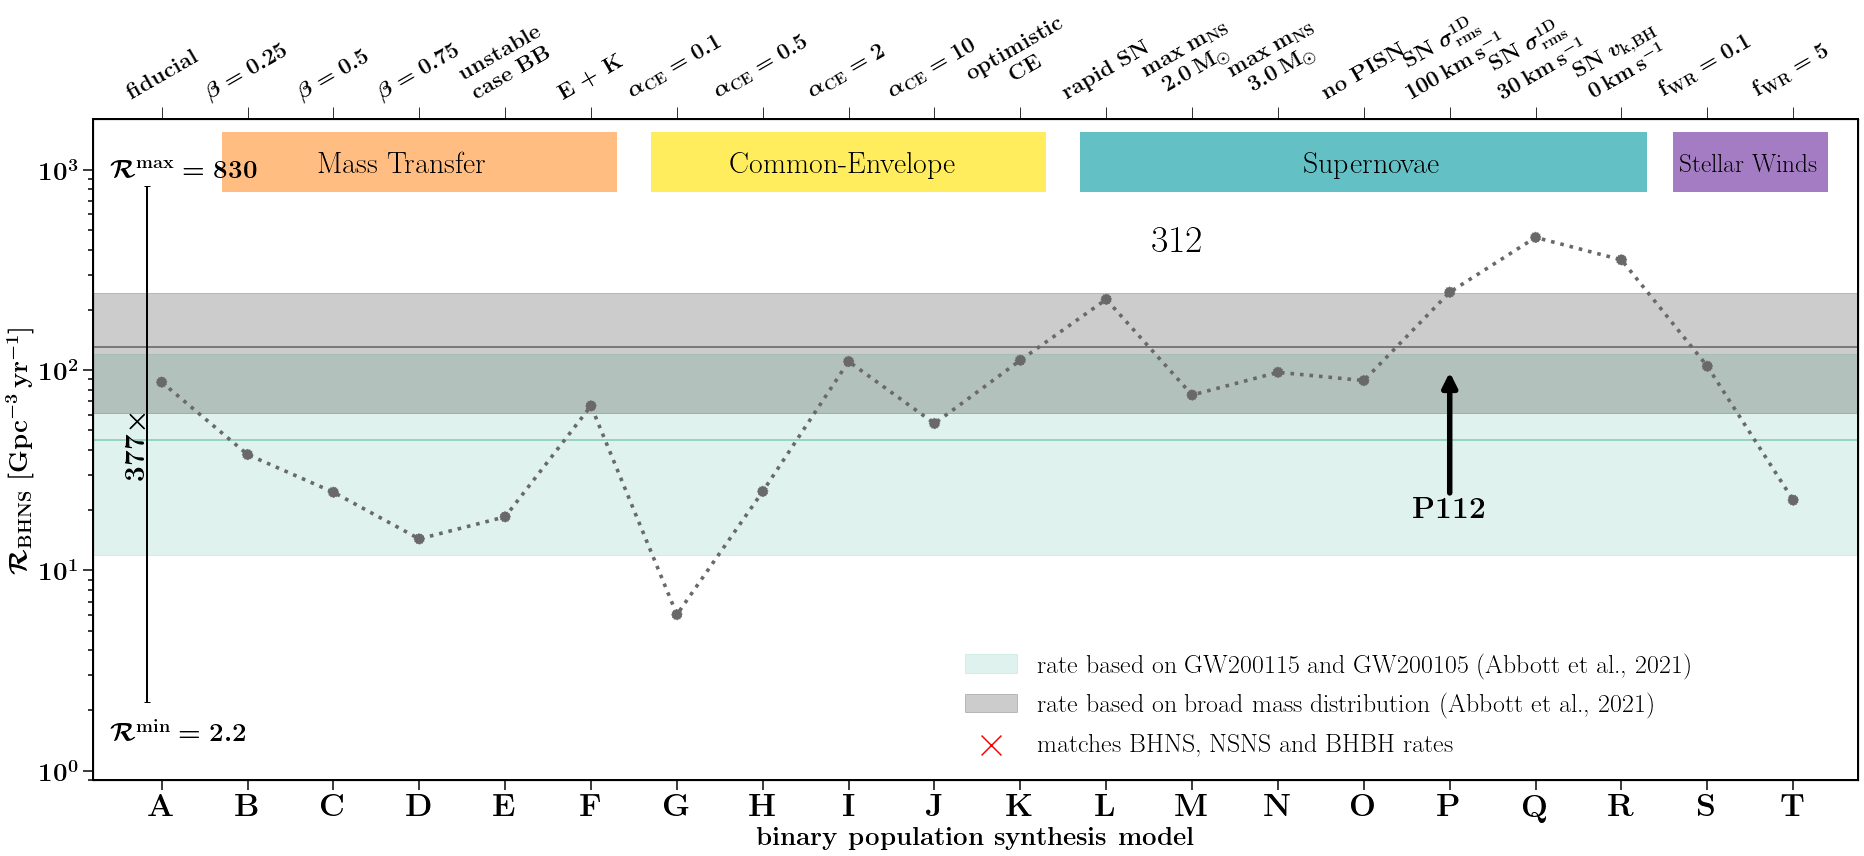

20 nModels


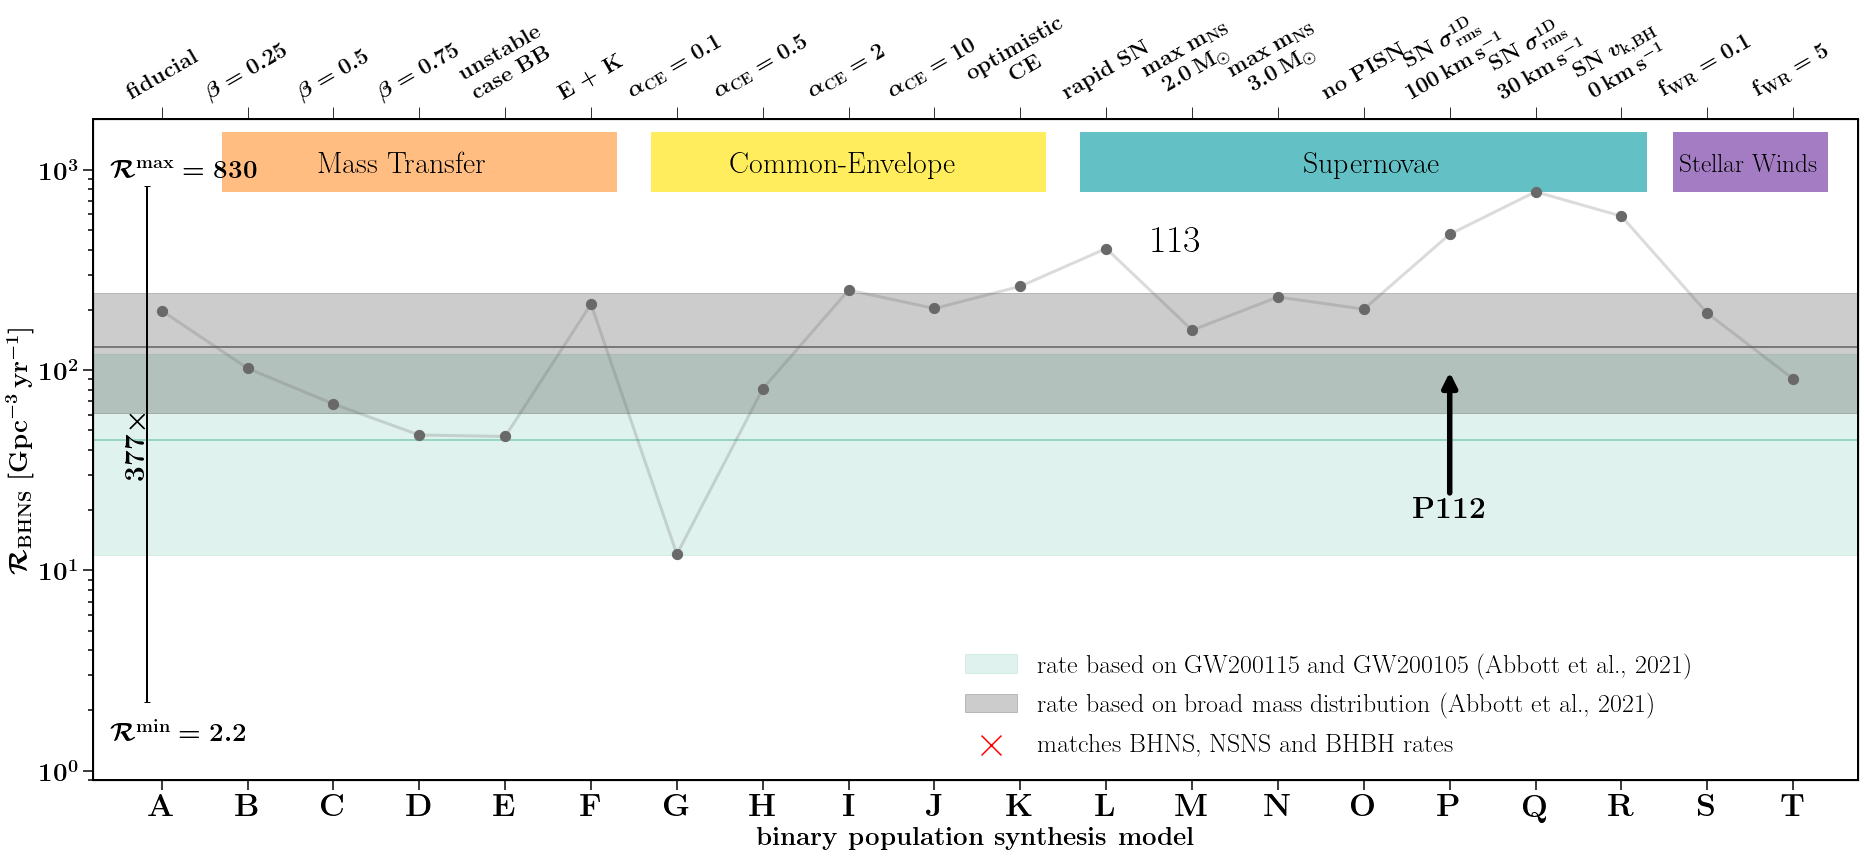

20 nModels


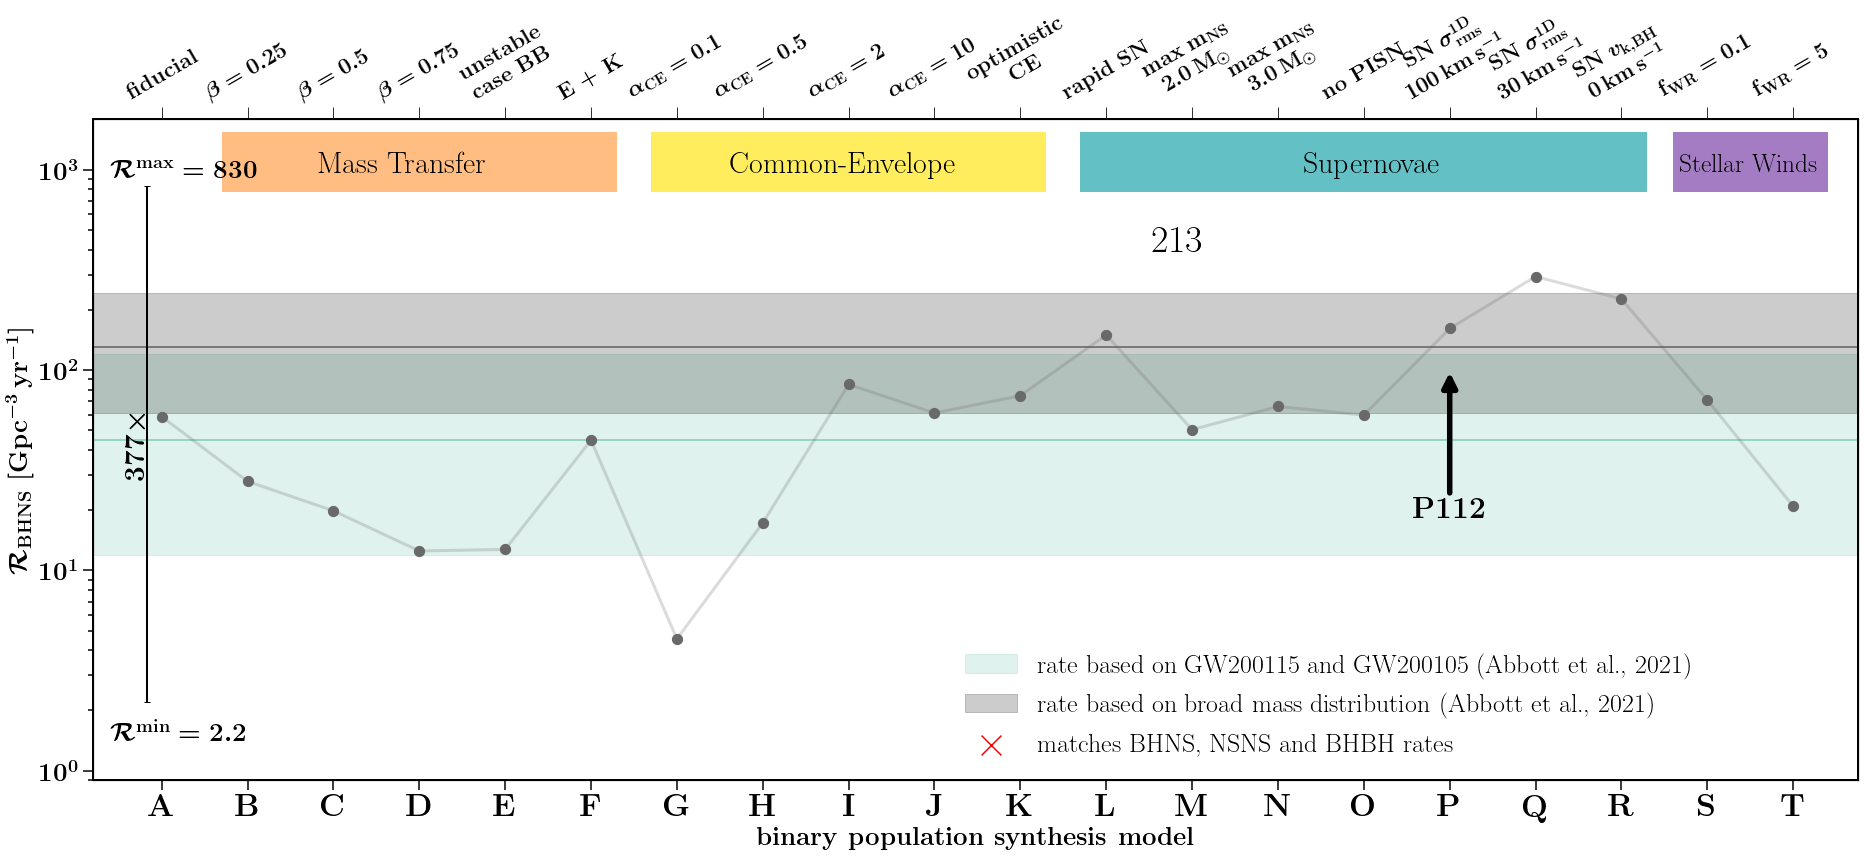

20 nModels


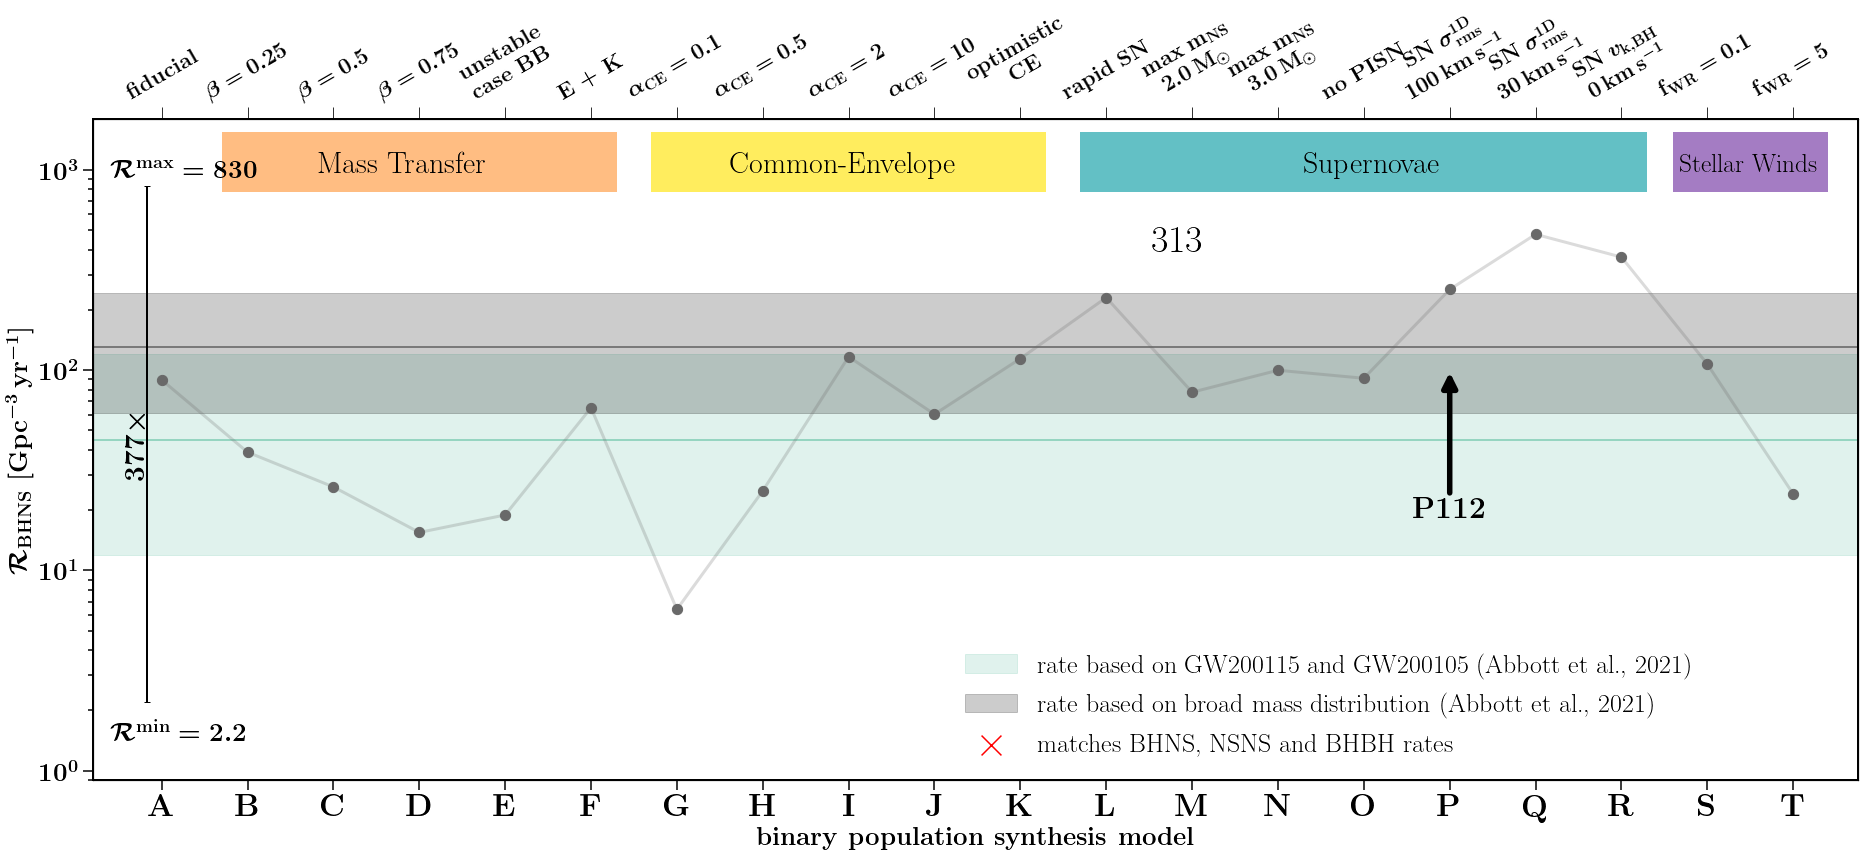

20 nModels


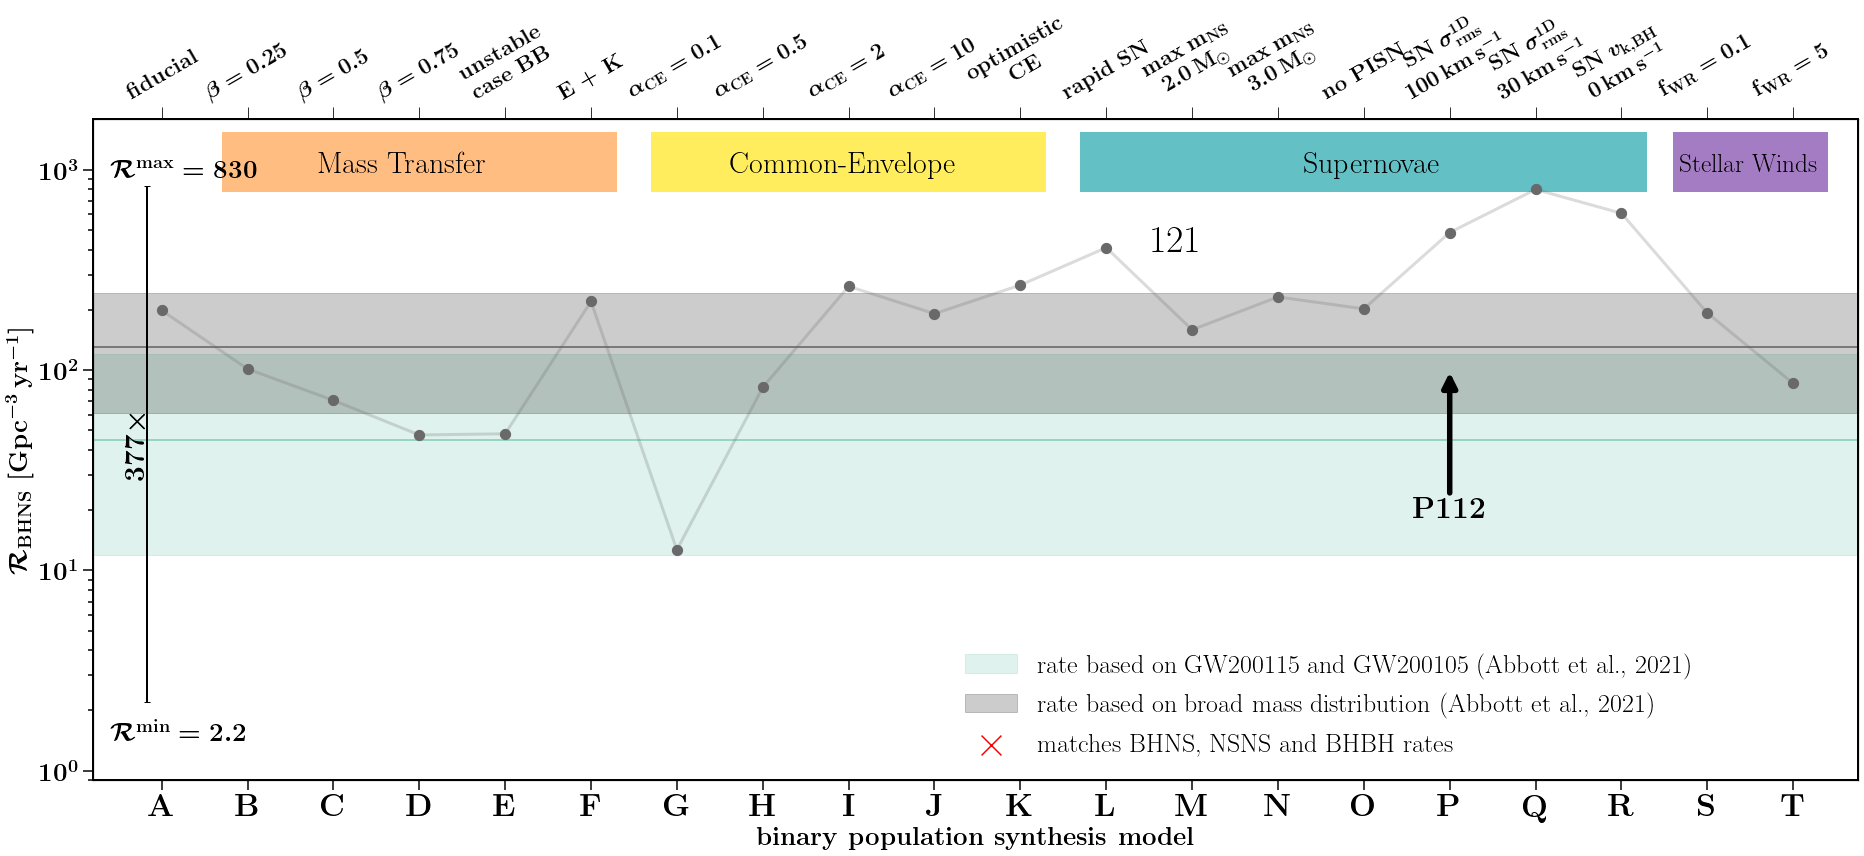

20 nModels


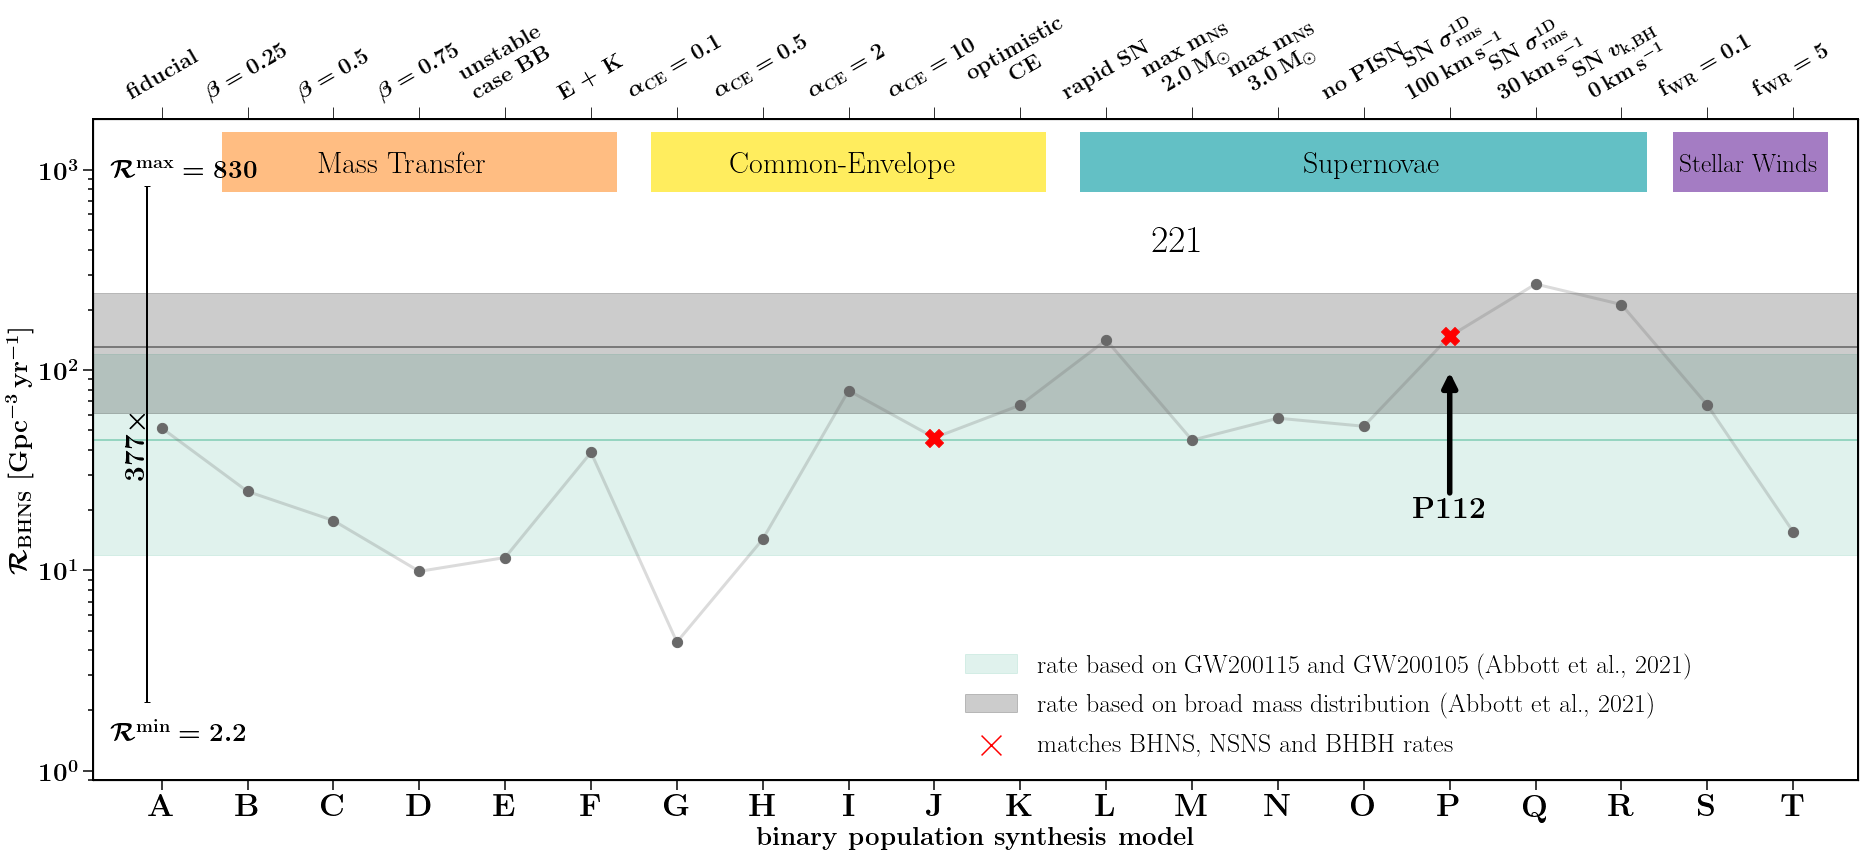

20 nModels


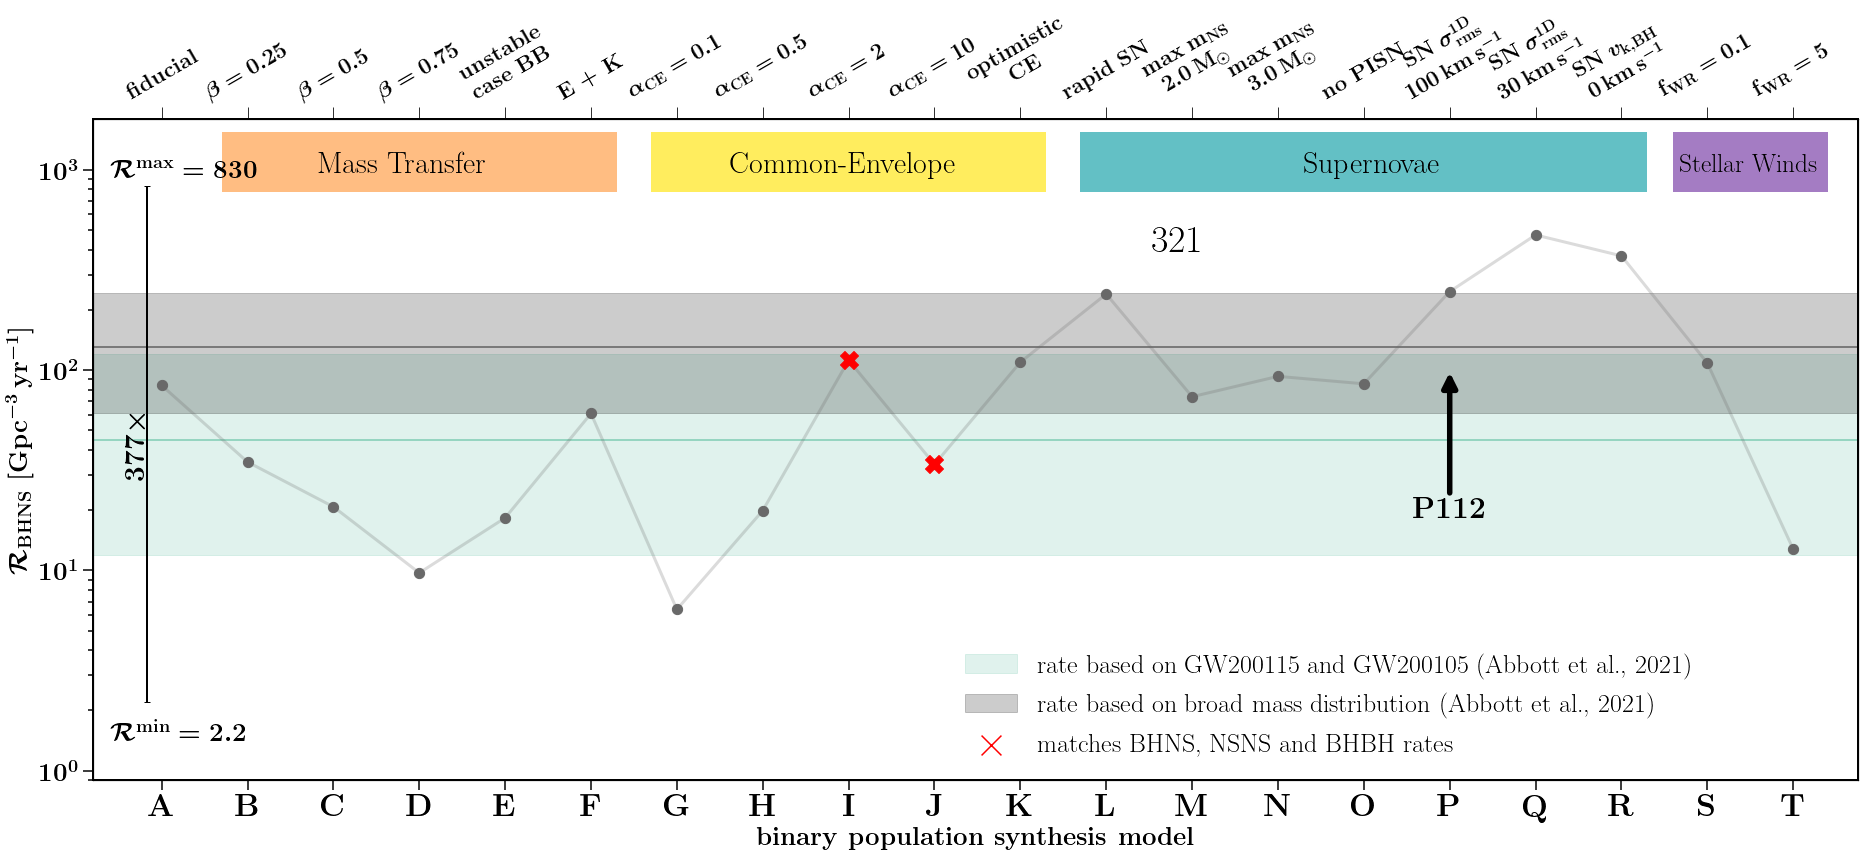

20 nModels


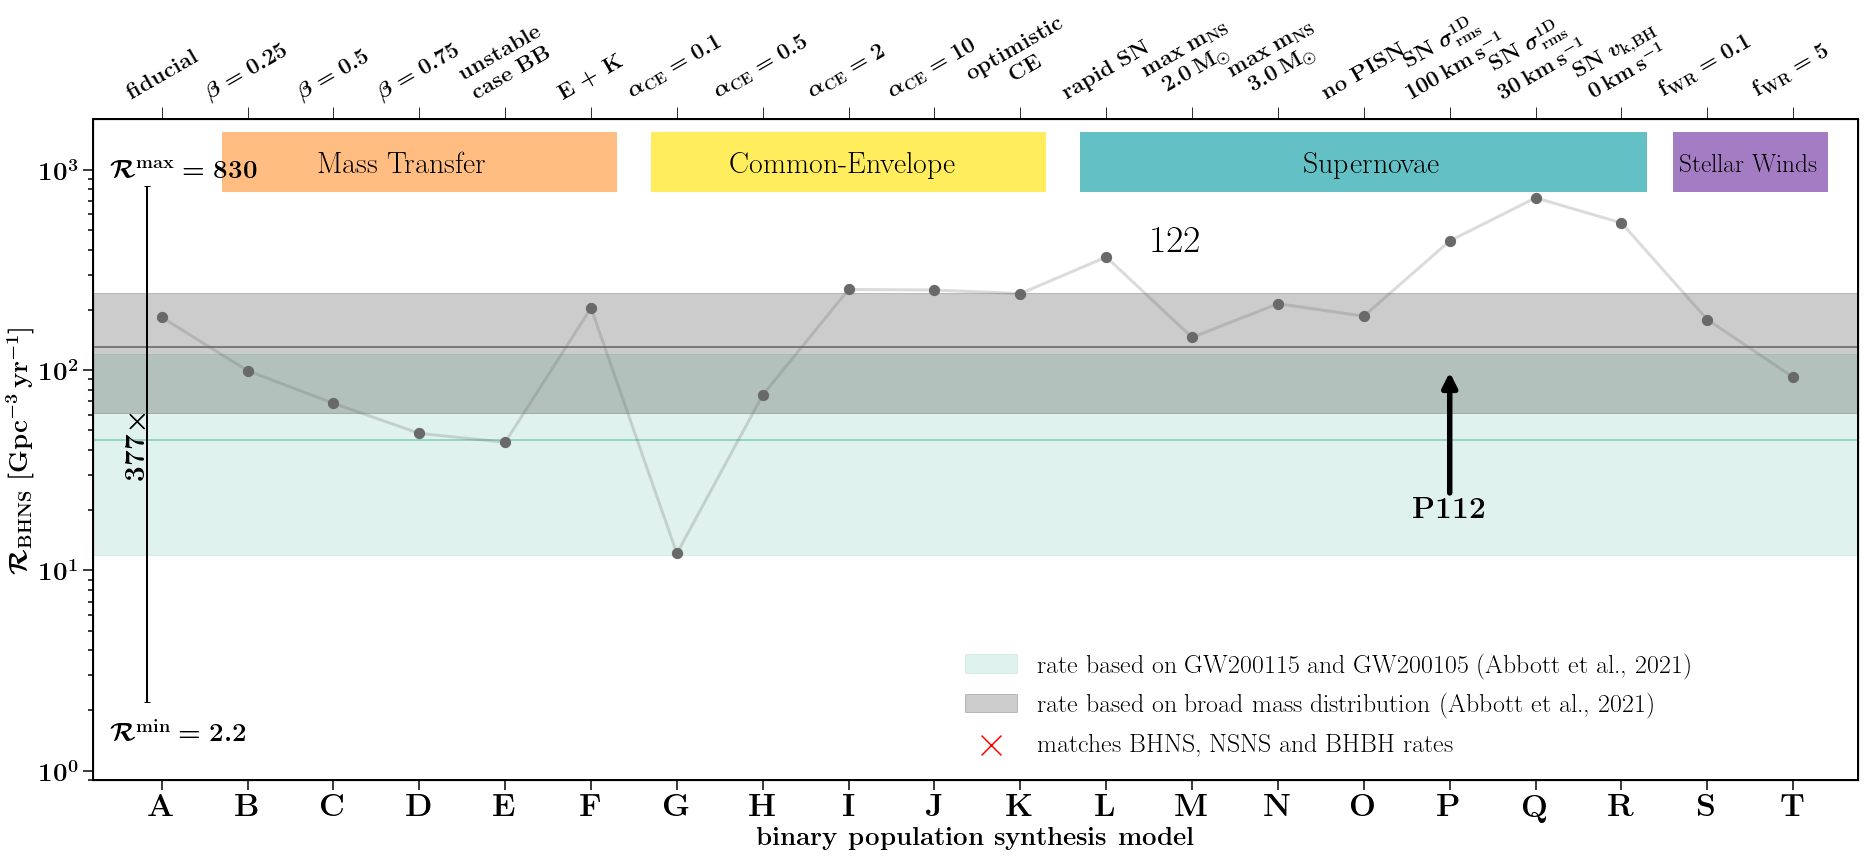

20 nModels


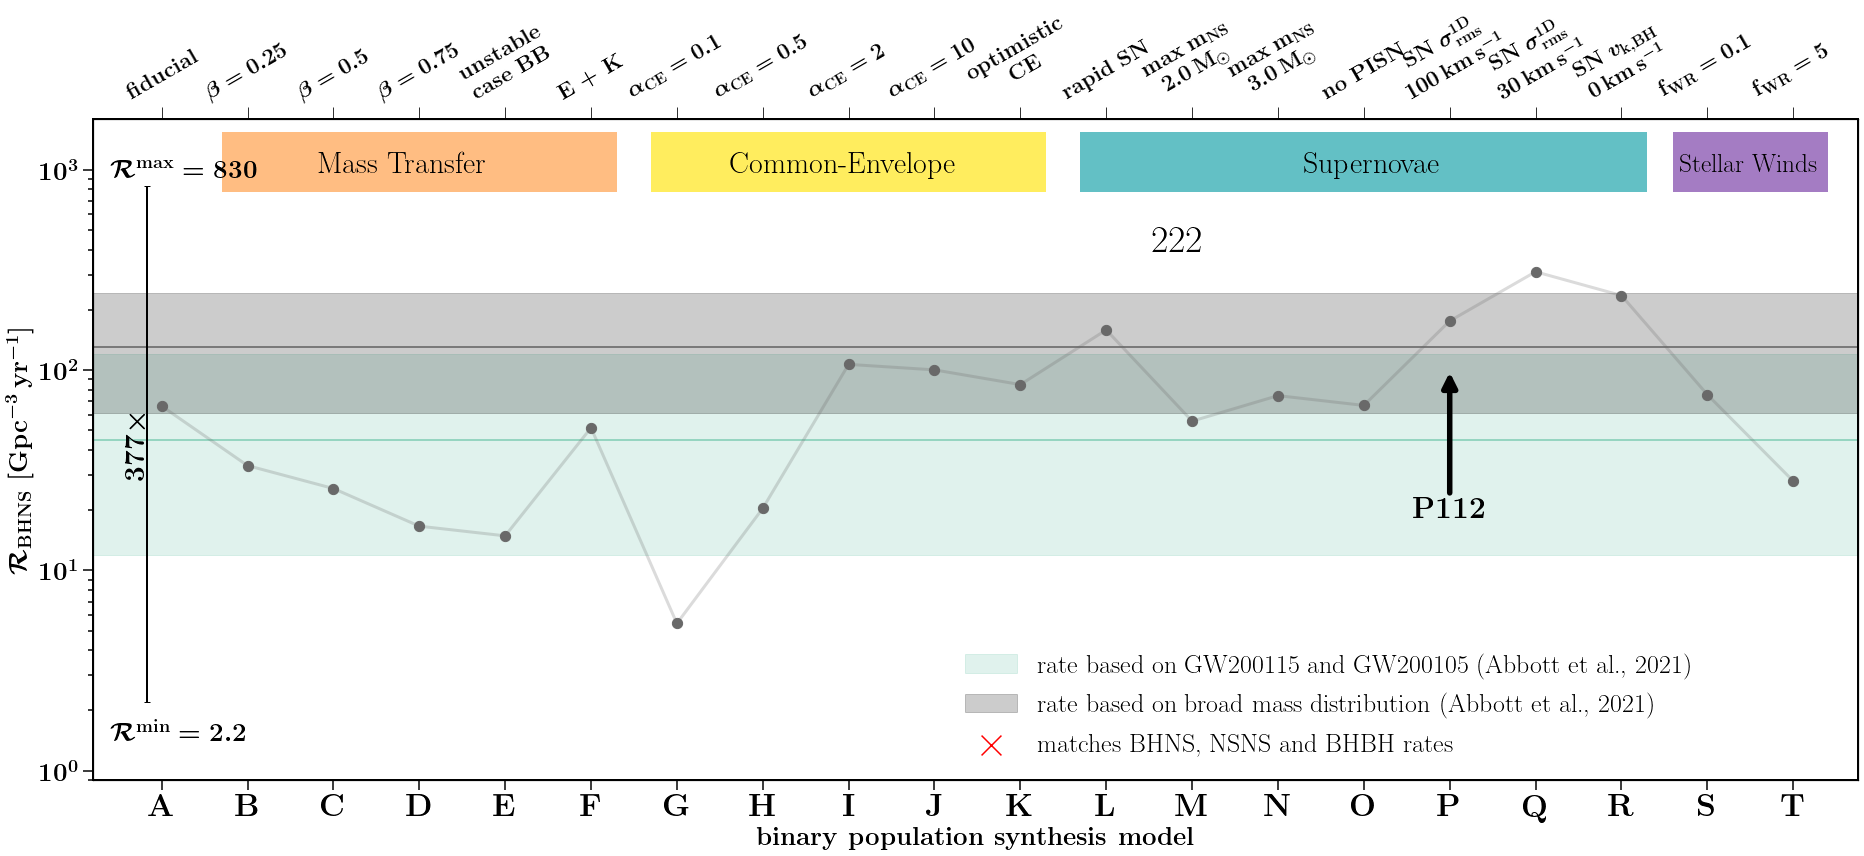

20 nModels


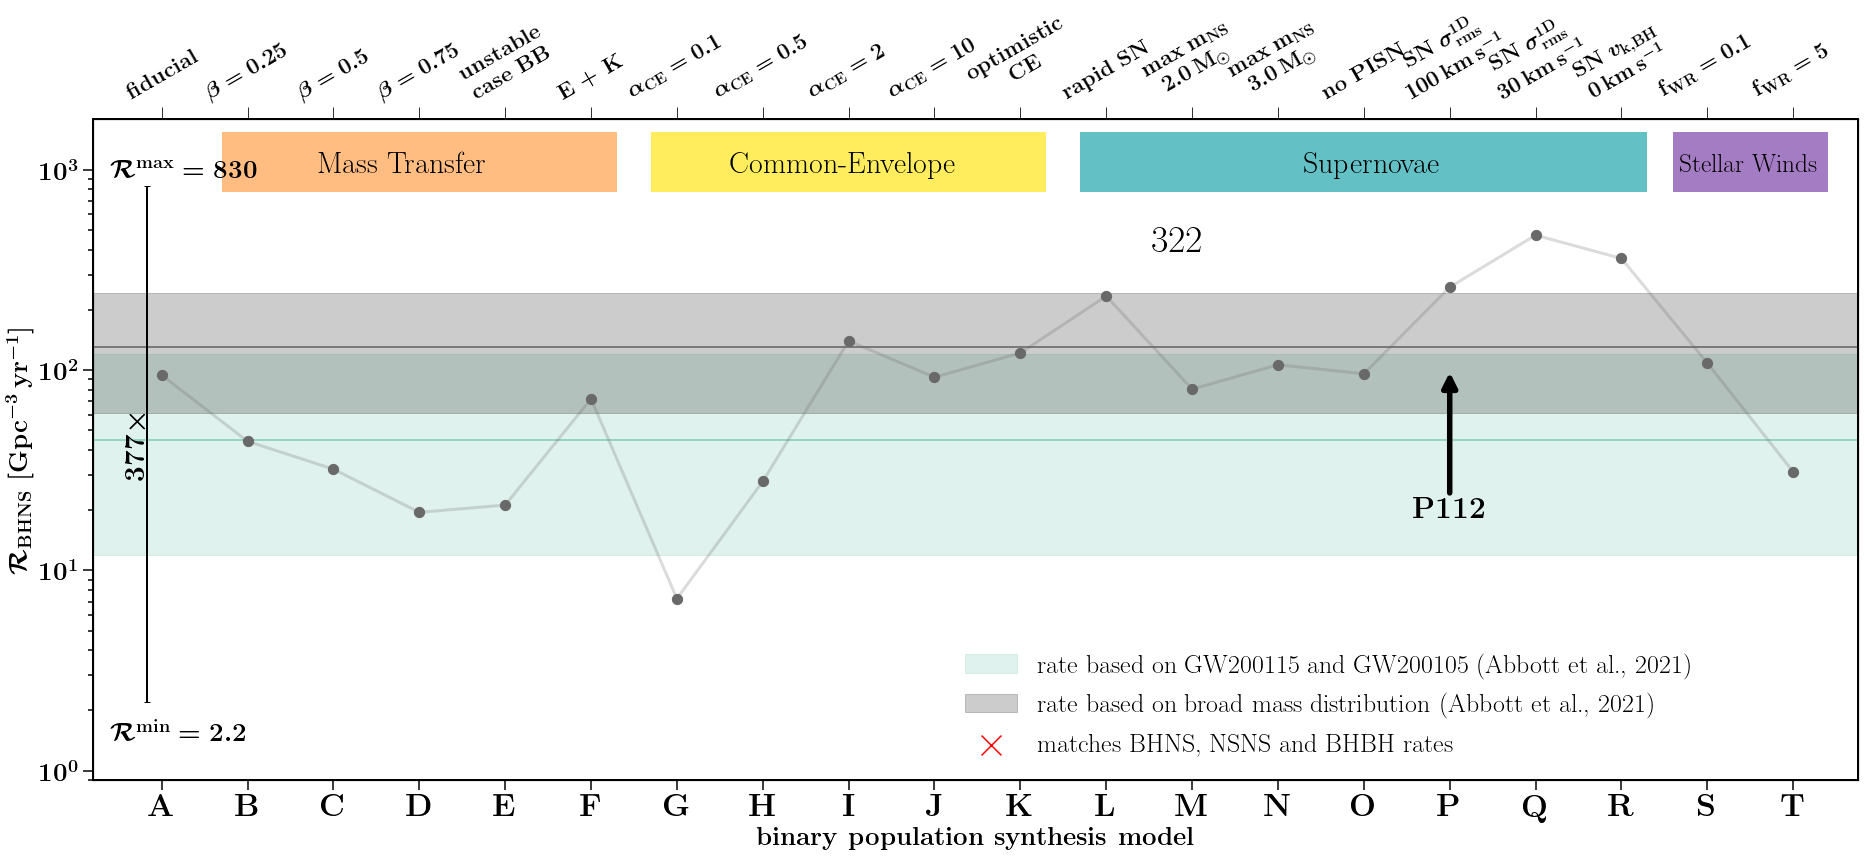

20 nModels


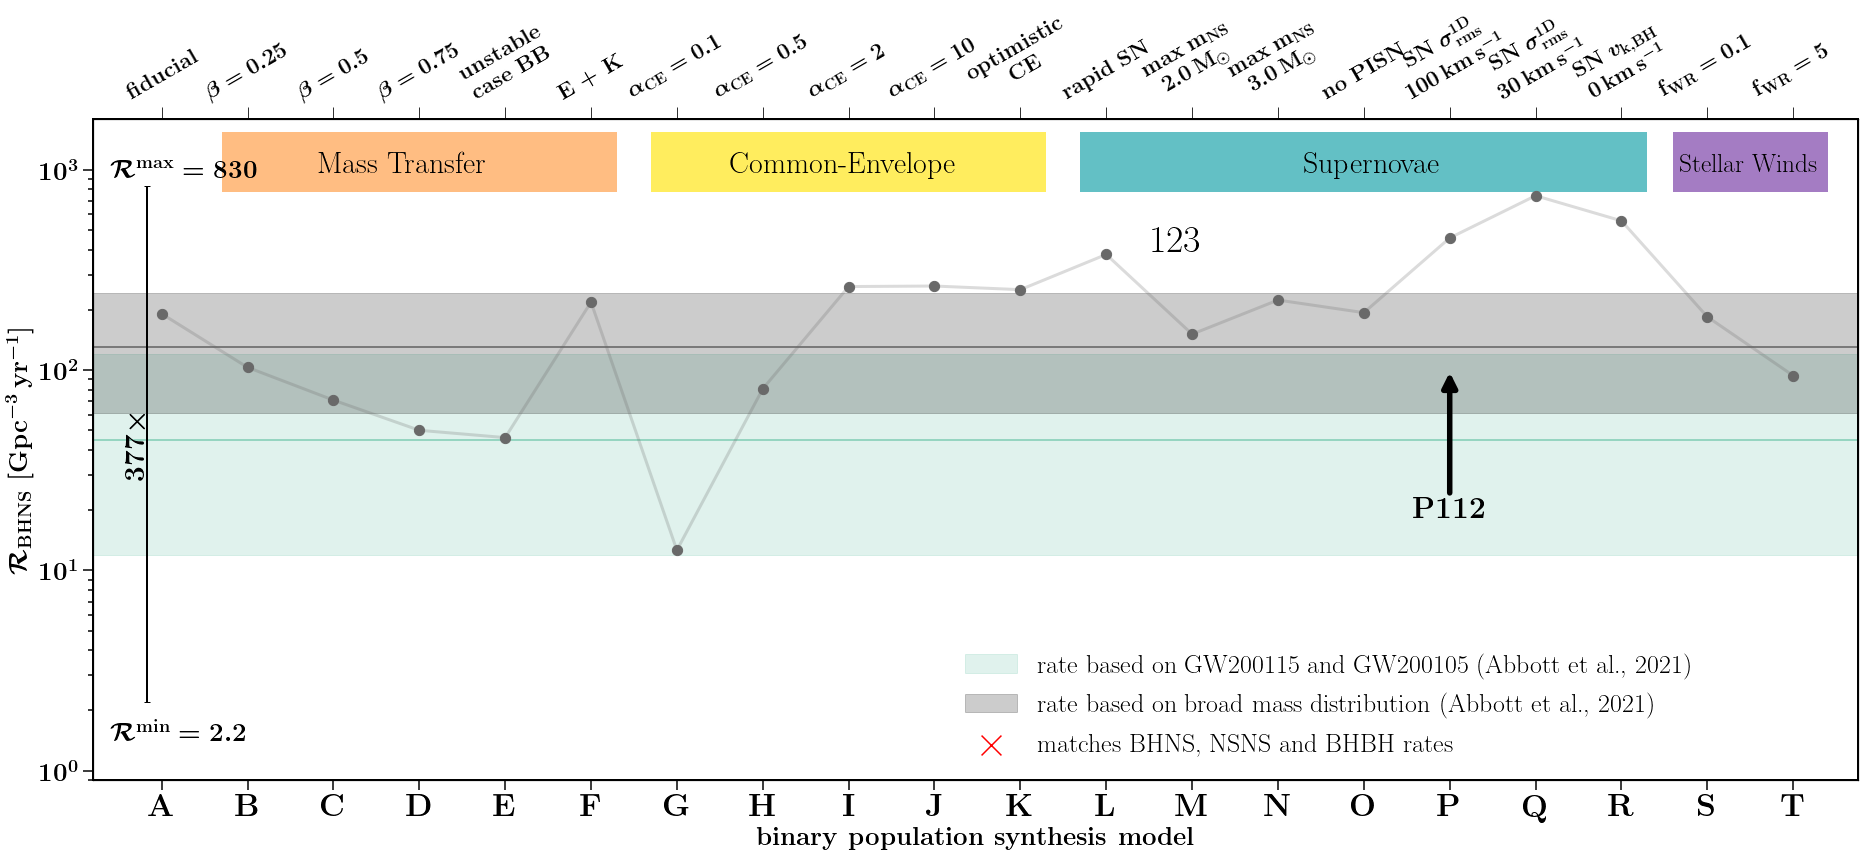

20 nModels


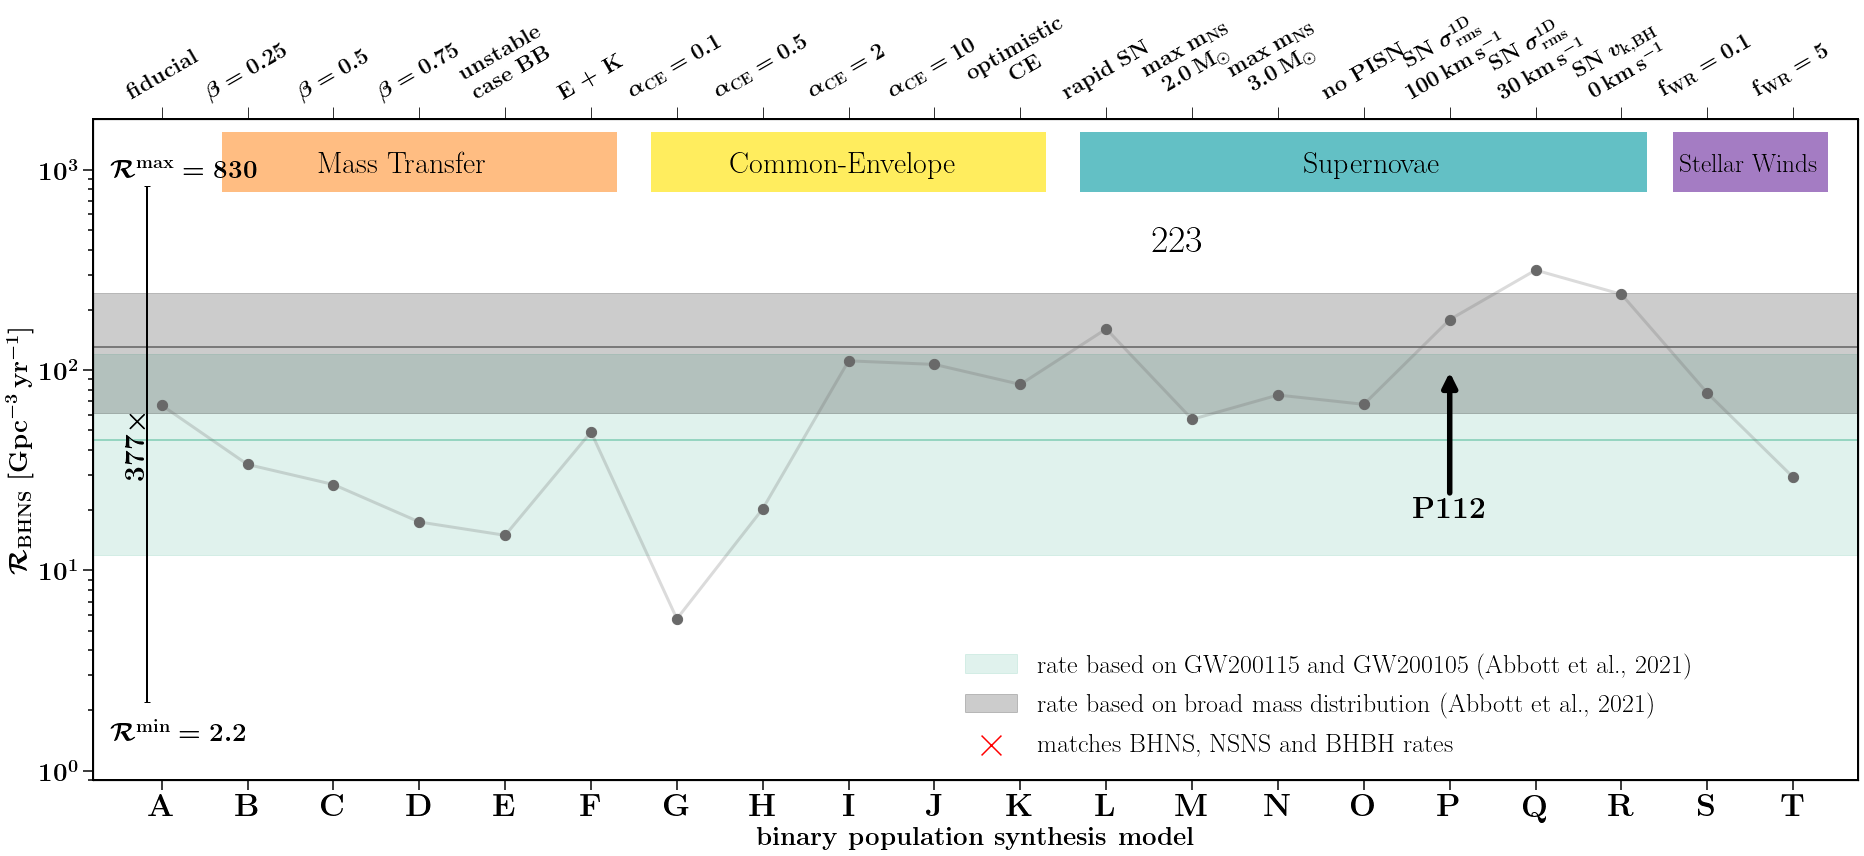

20 nModels


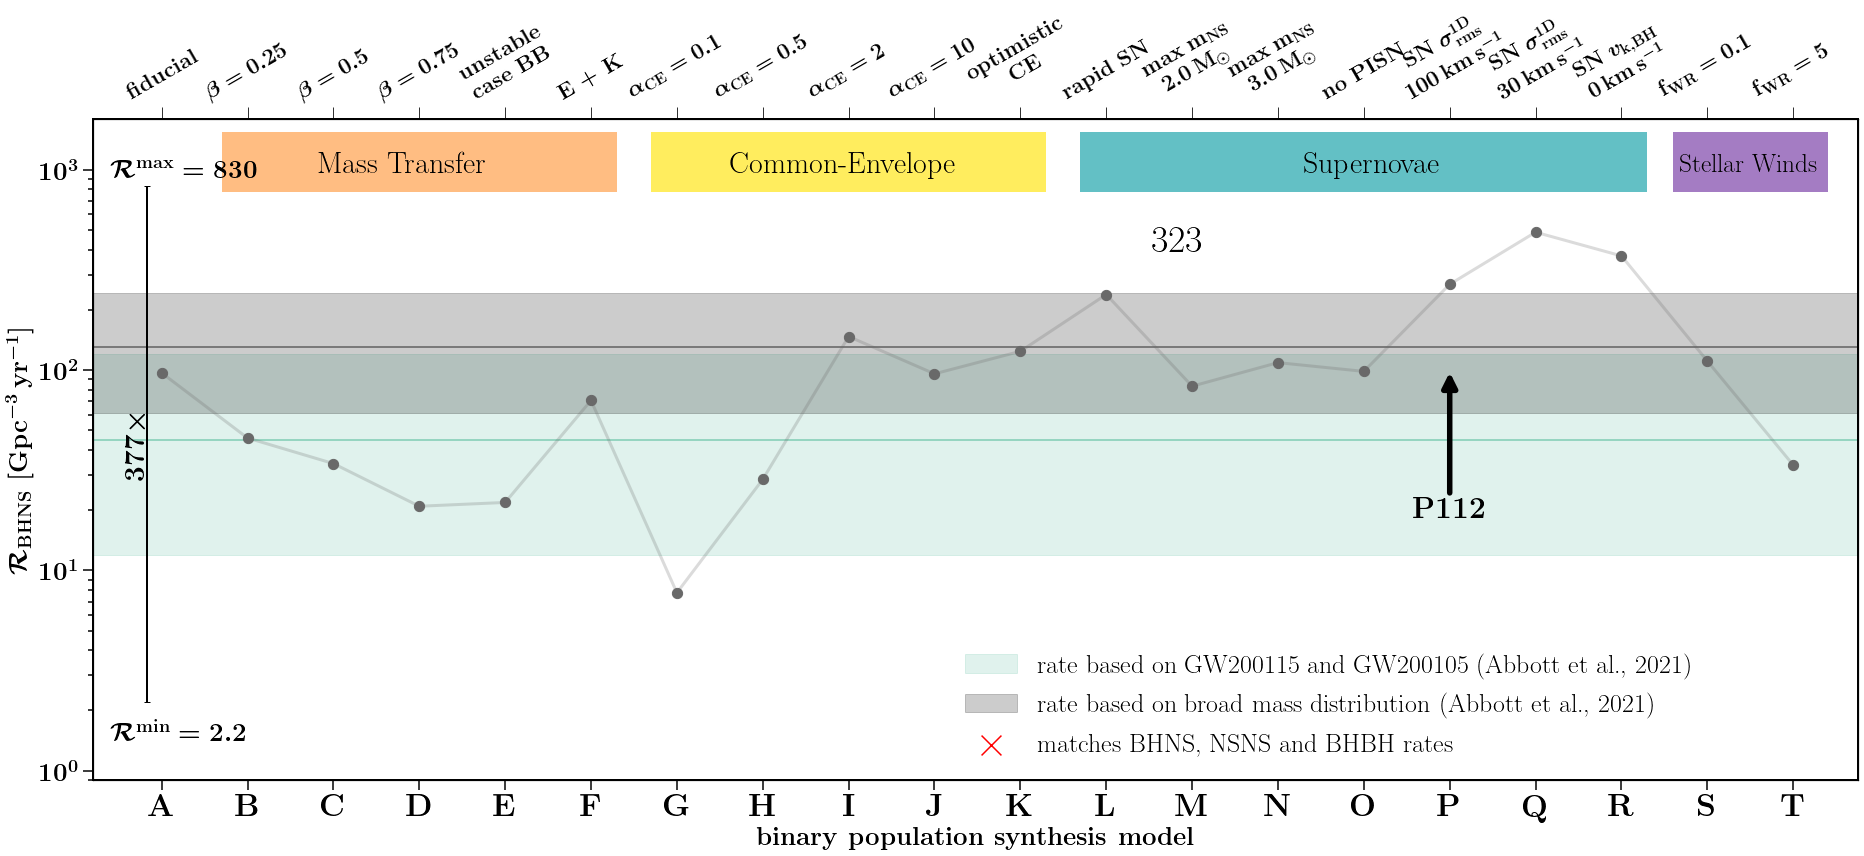

20 nModels


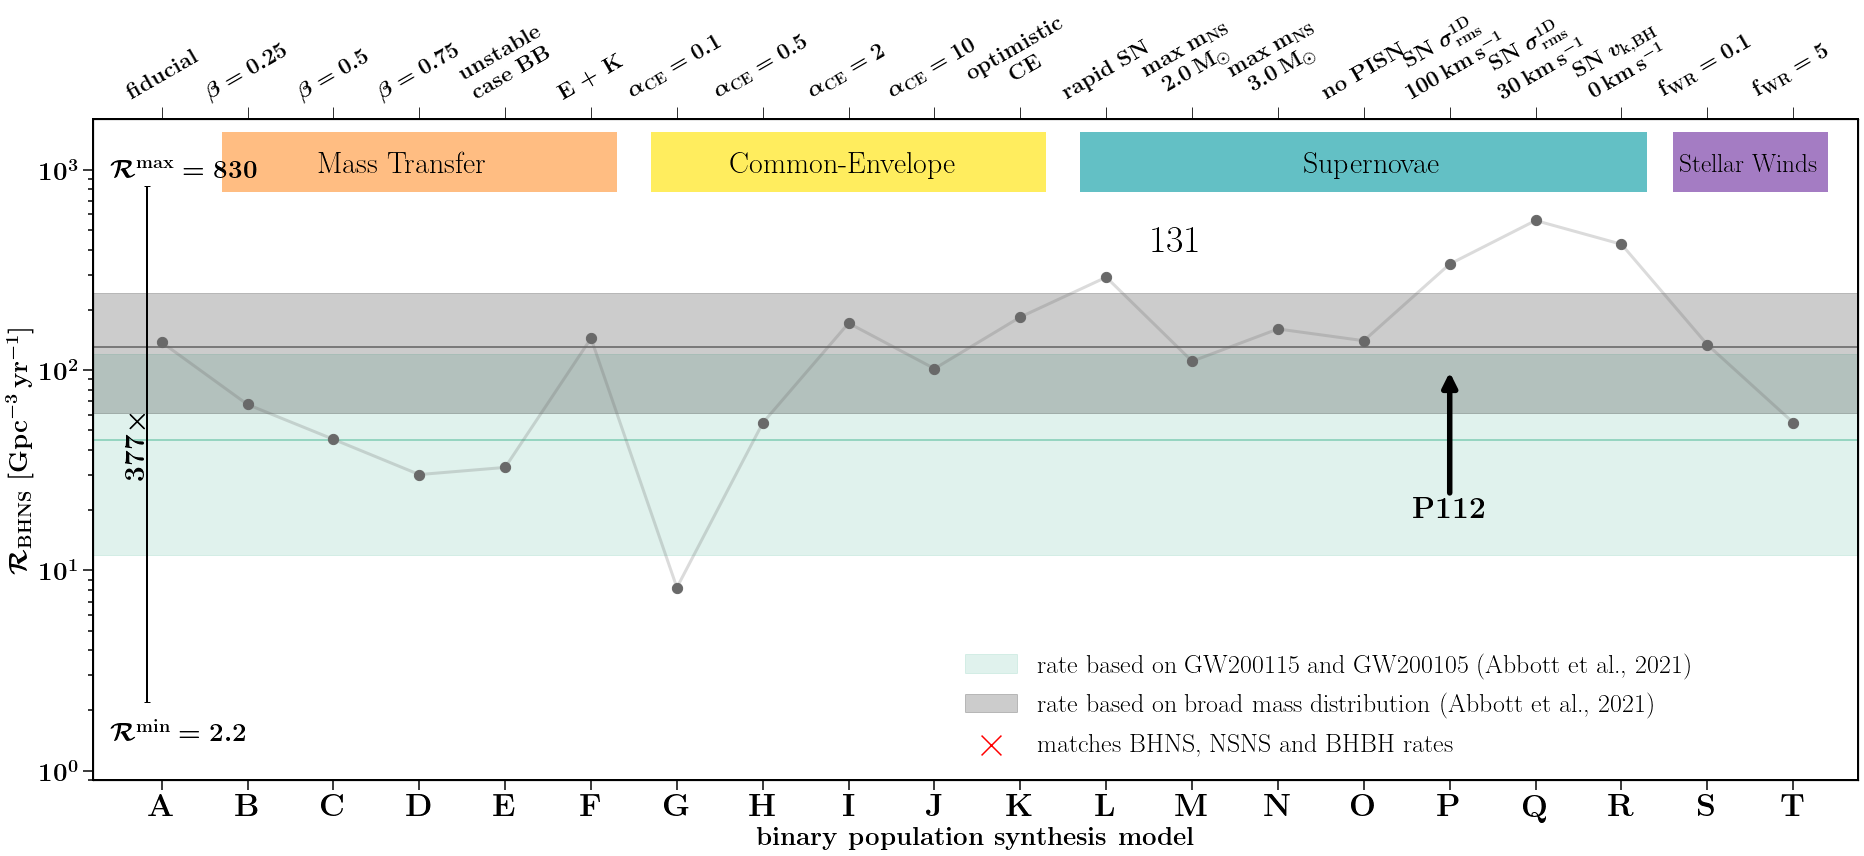

20 nModels


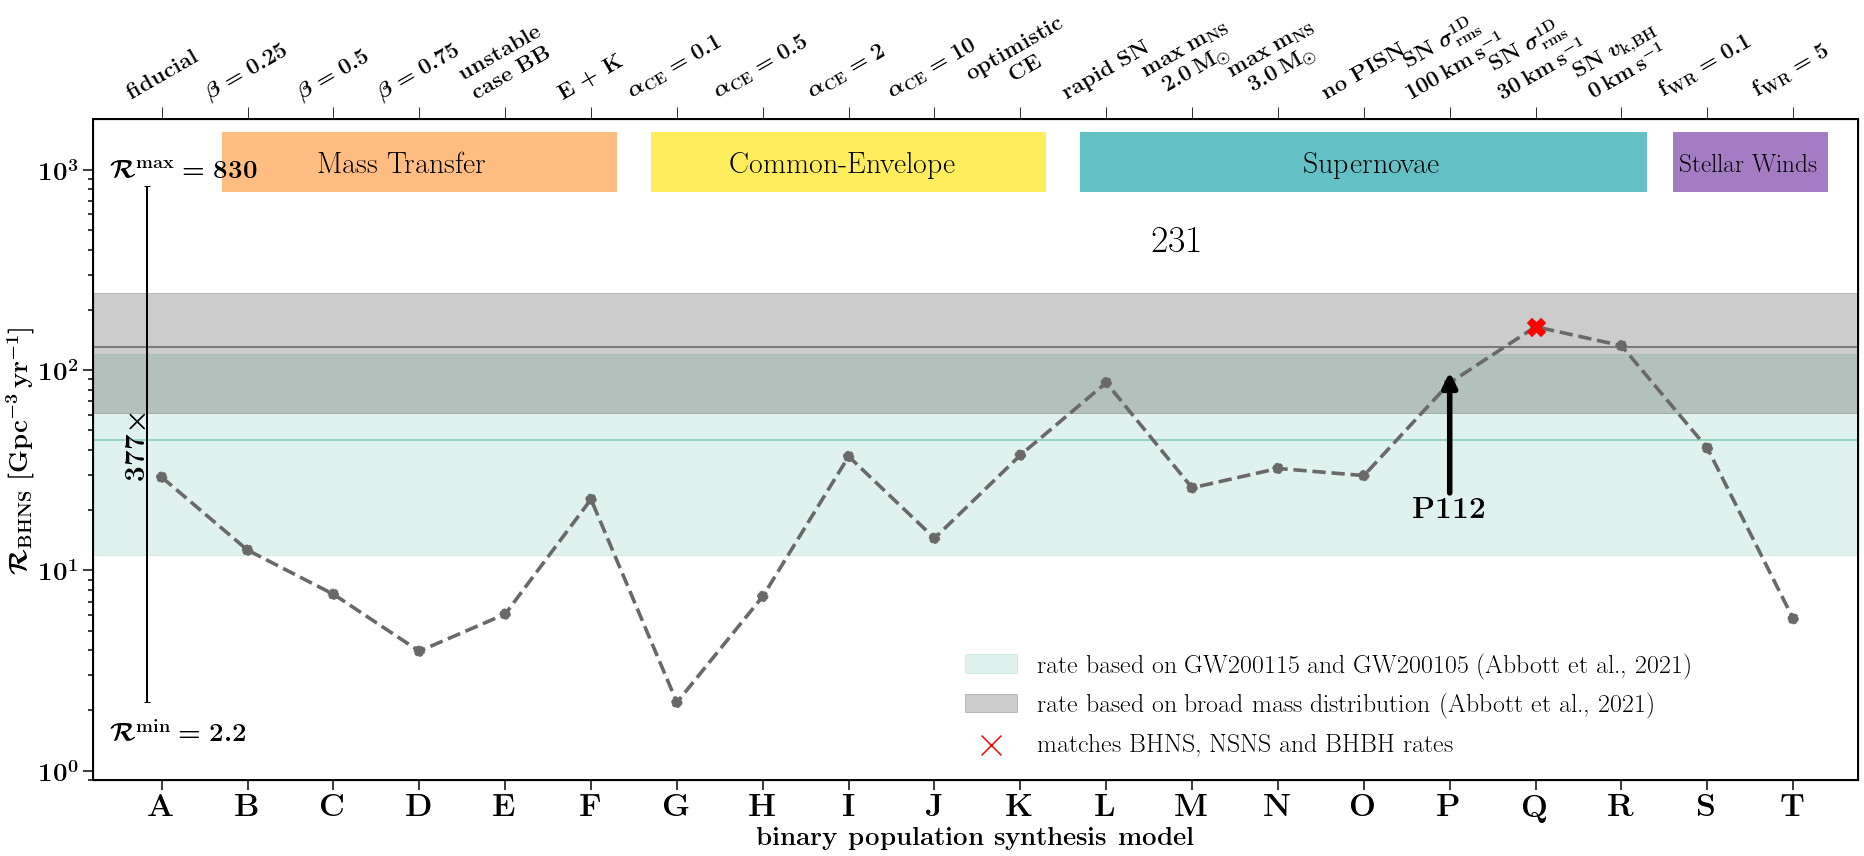

20 nModels


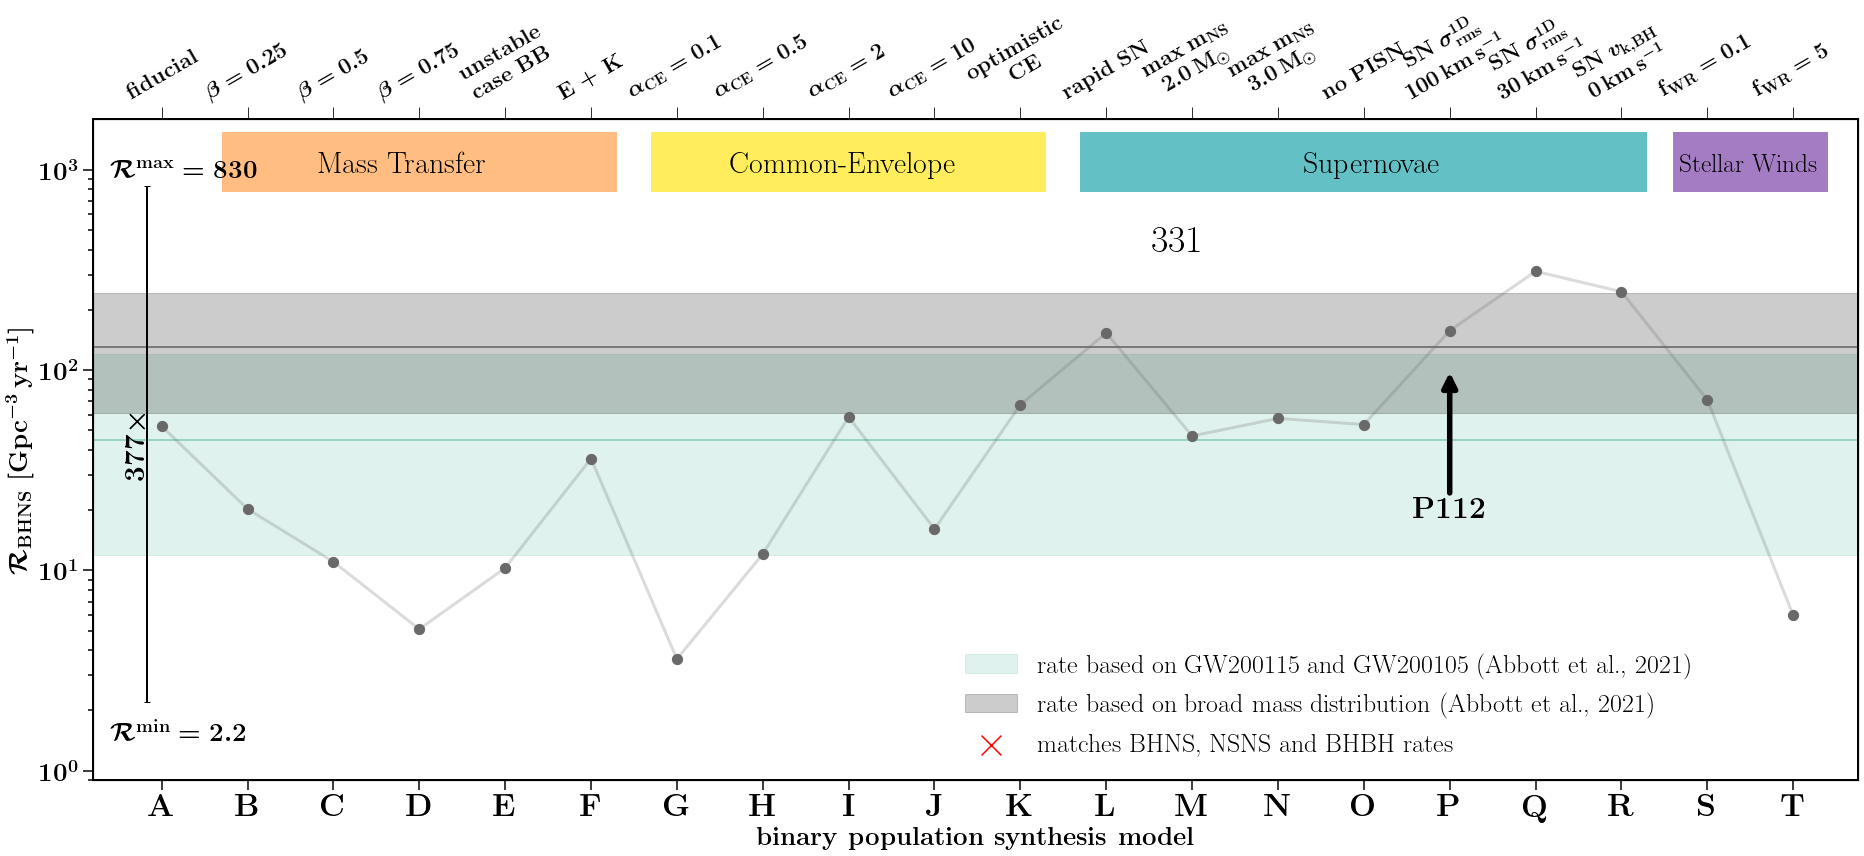

20 nModels


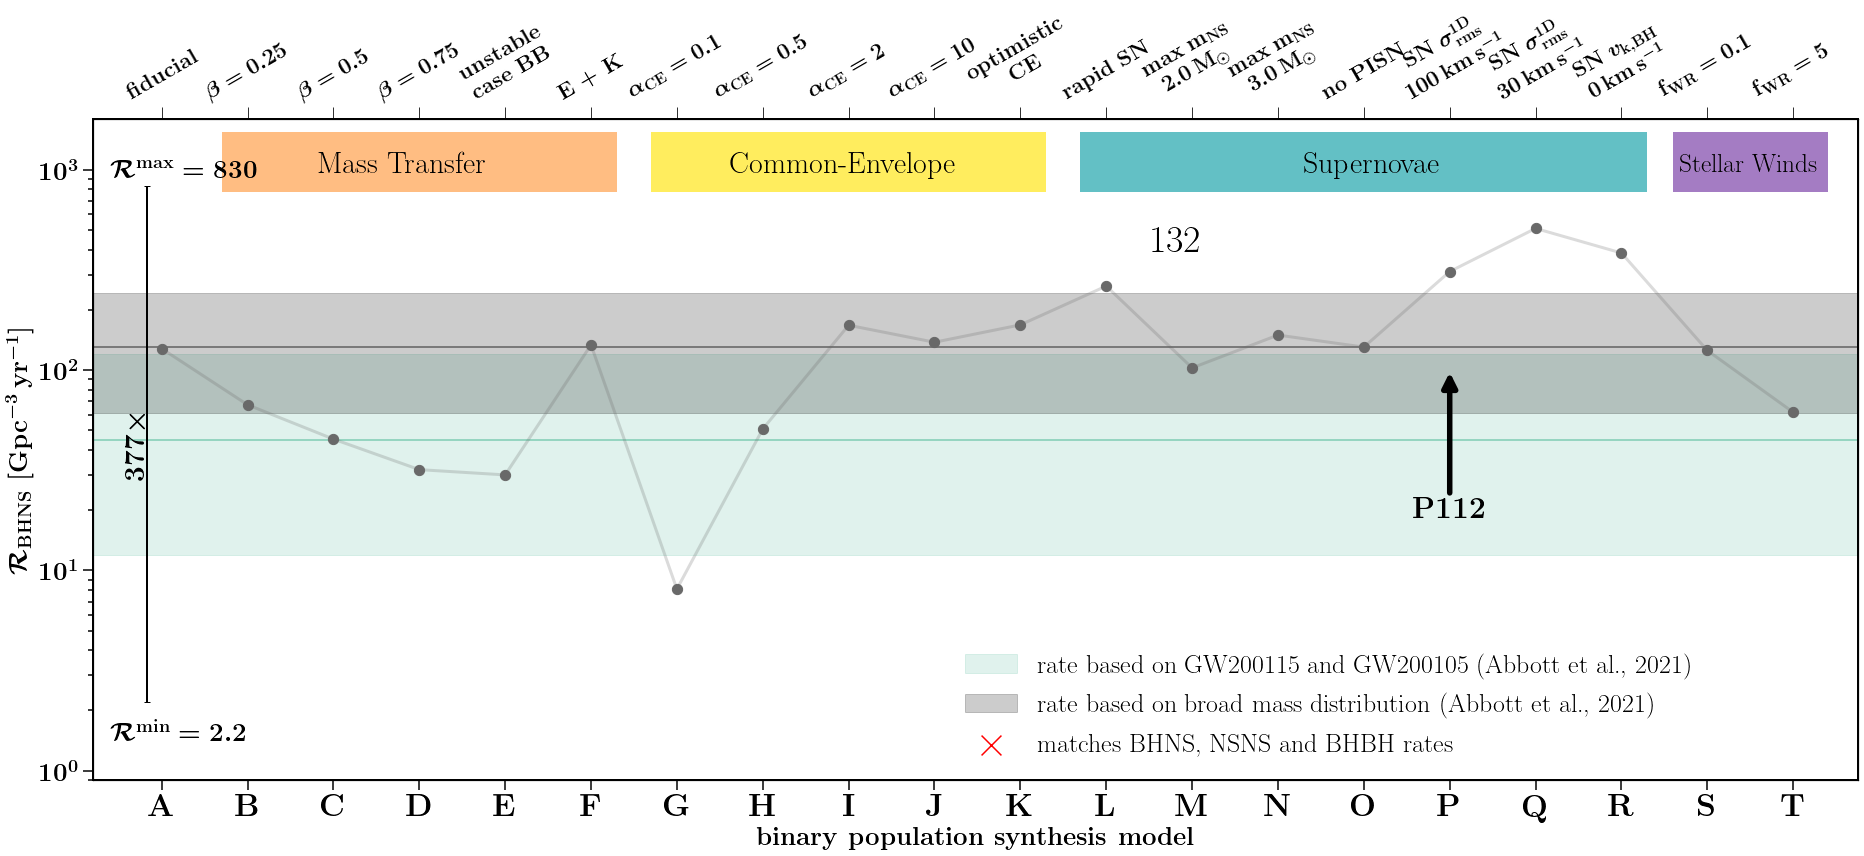

20 nModels


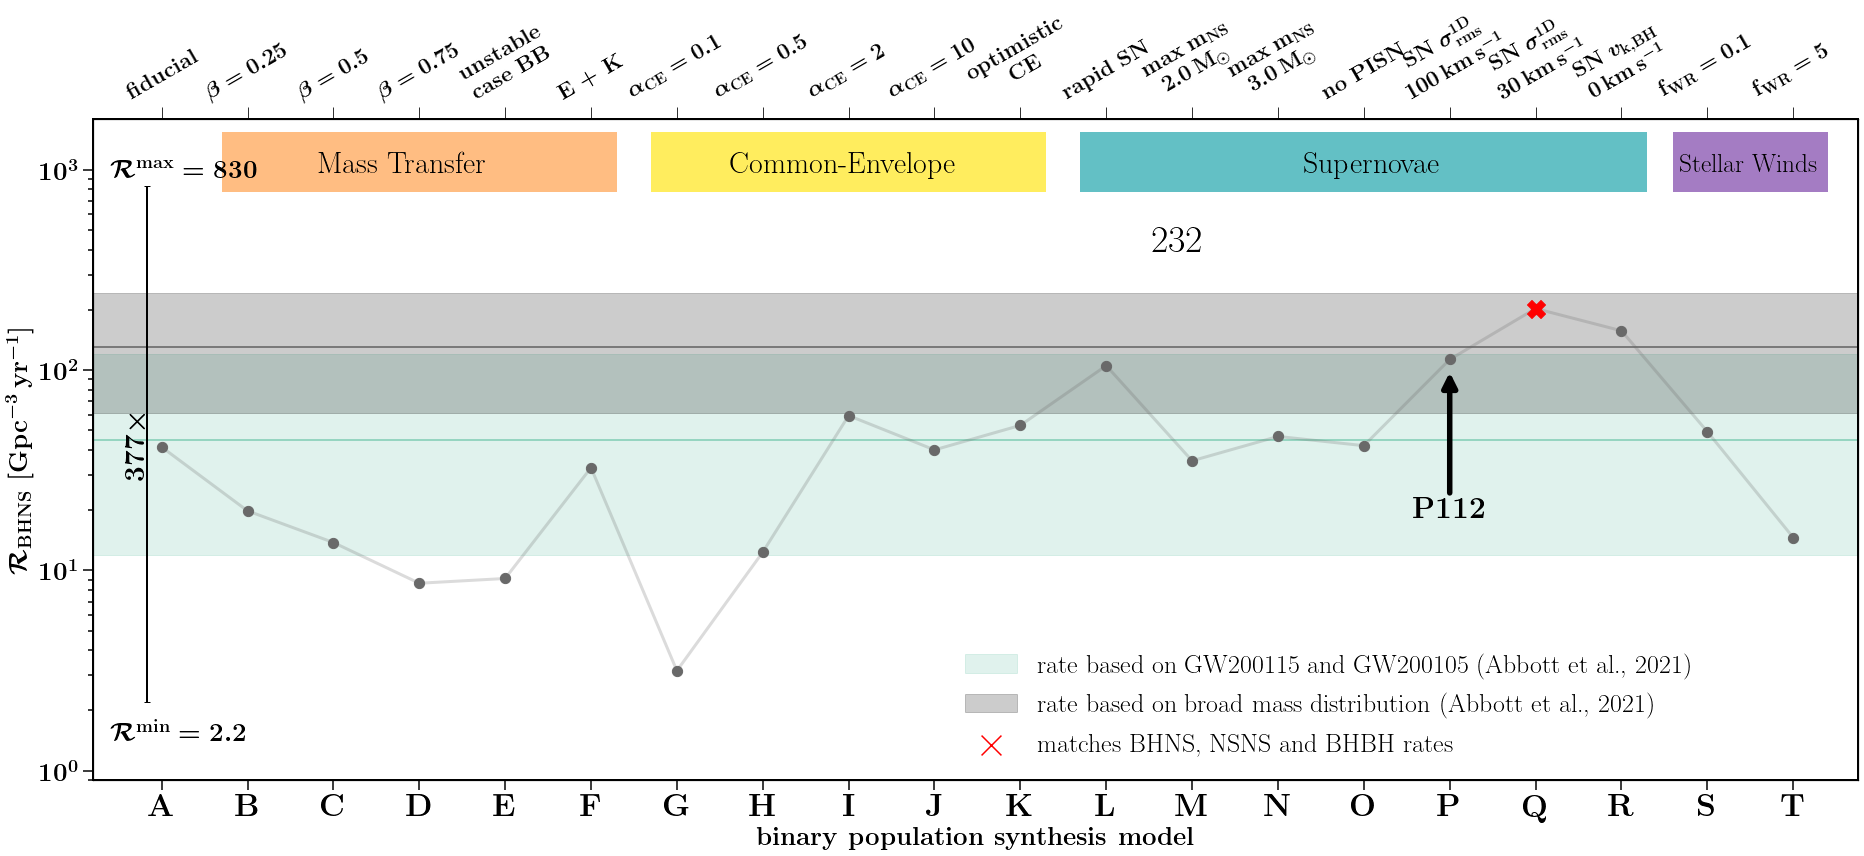

20 nModels


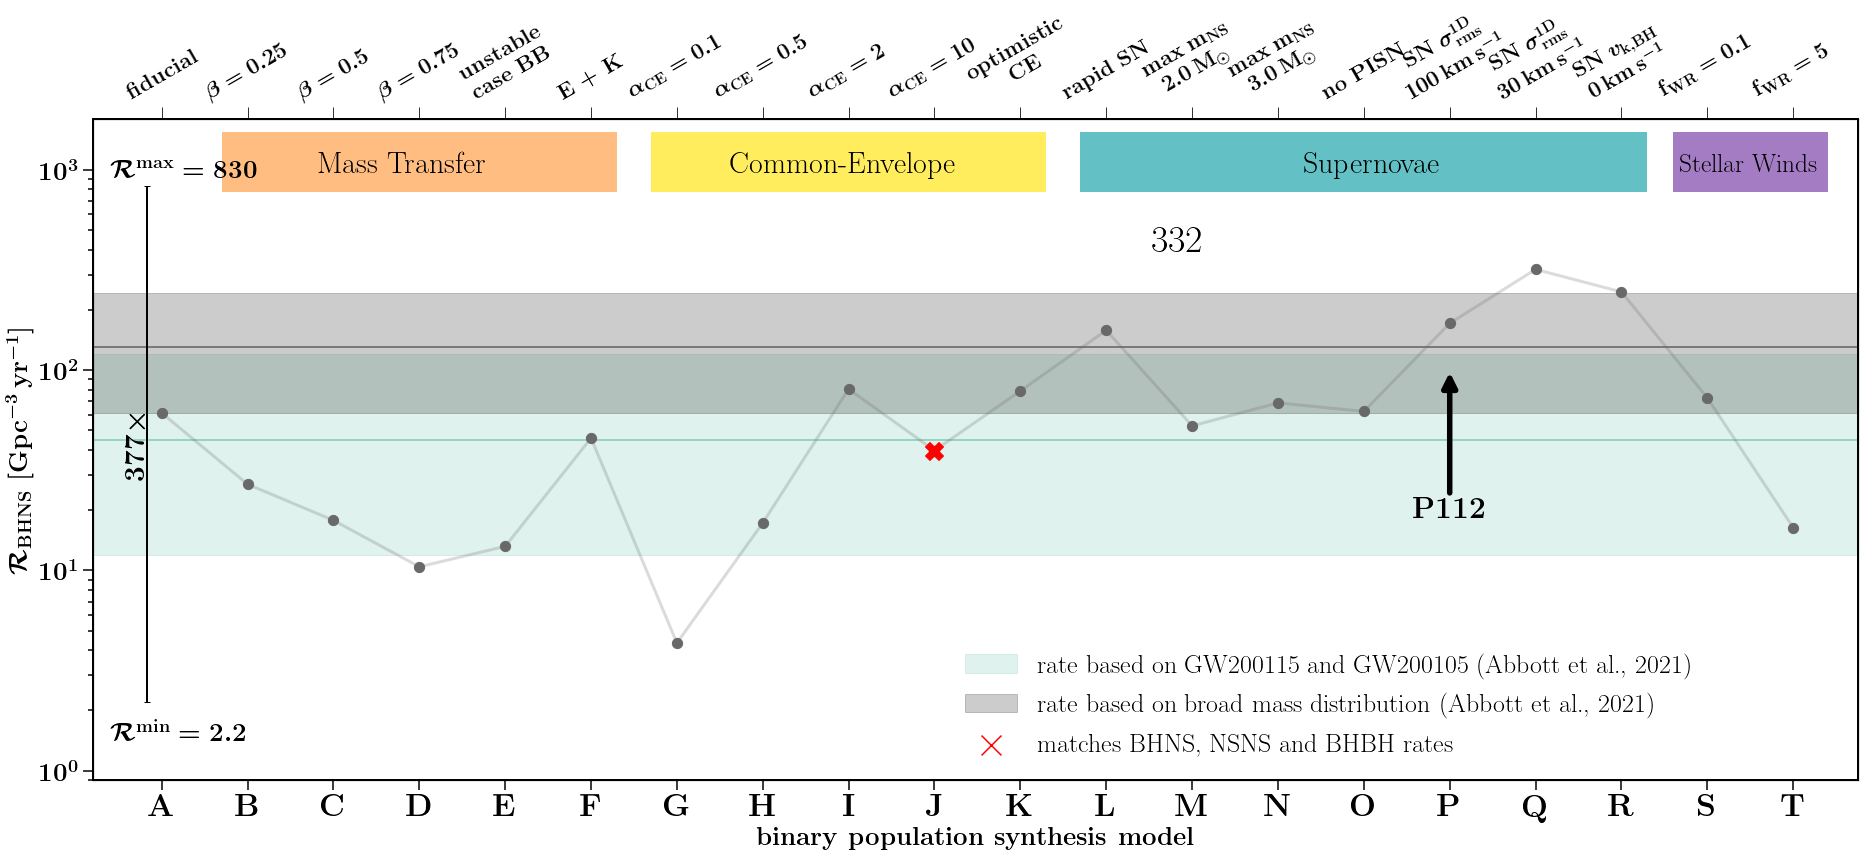

20 nModels


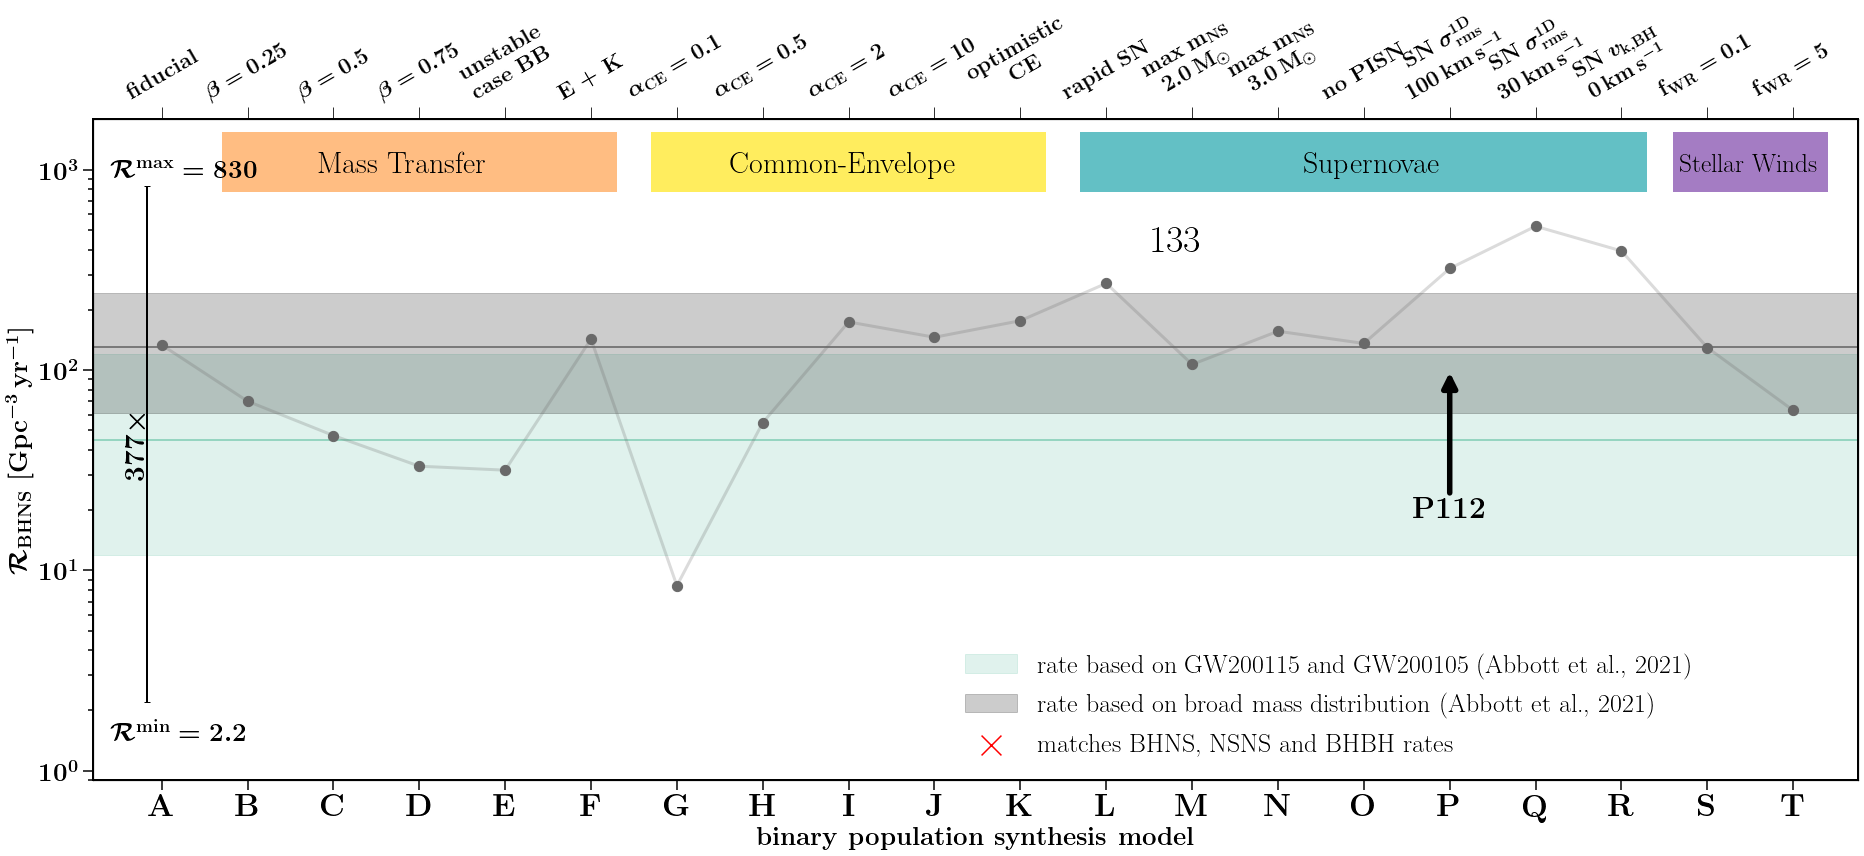

20 nModels


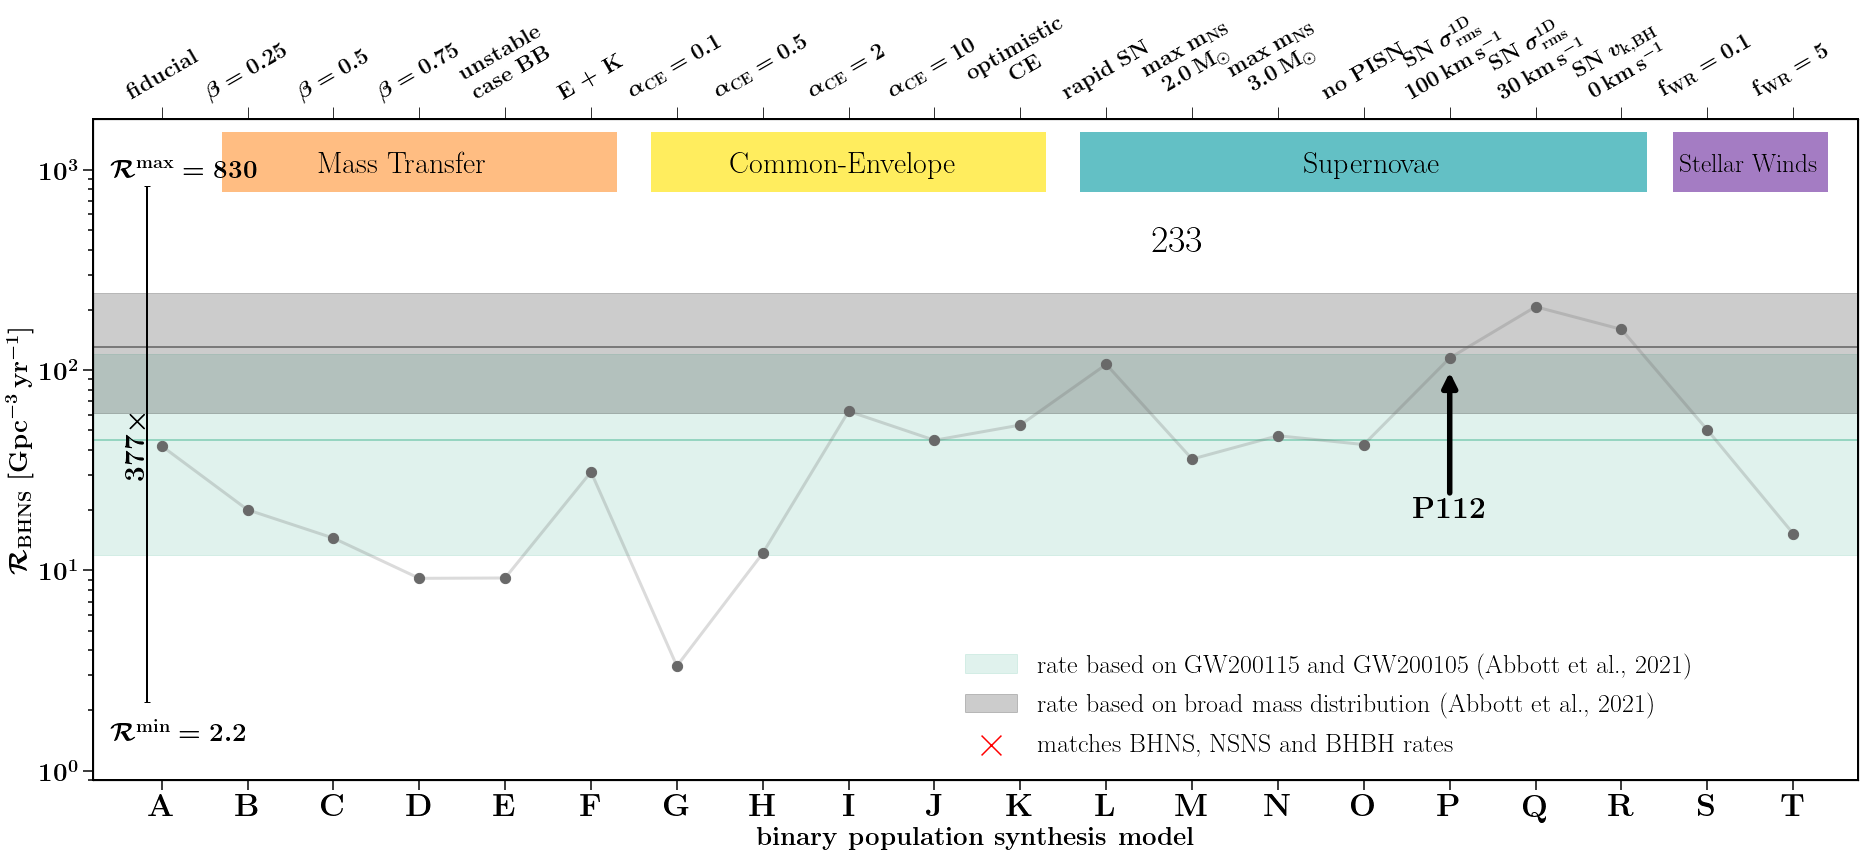

20 nModels


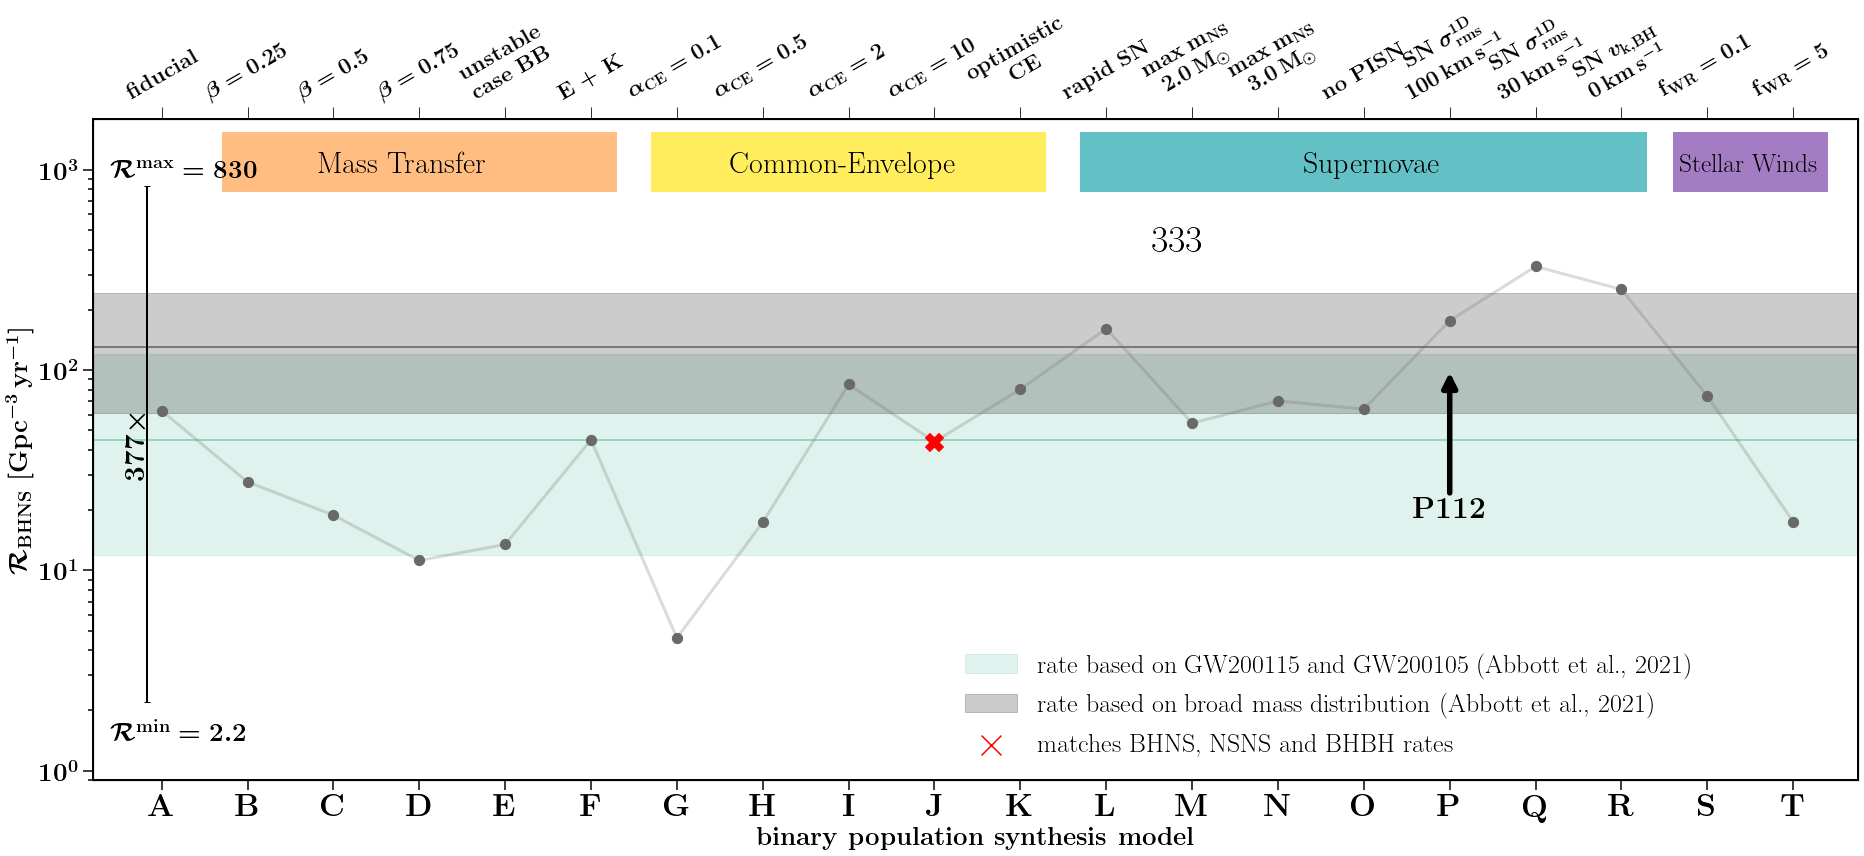

In [5]:
fs = 30


GW200115  = [36-30, 36, 36+82] #
GW200105  = [16-14, 16, 16+38] #
#  z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf Gpc-3 yr-1 from: GWTC-2-redshift dependent Section 5.3  https://arxiv.org/abs/2010.14533
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf
BHNSrate0 = [12, 242]


BHNS_event = [45-33, 45, 45+75]
BHNS_pop = [130-69, 130, 130+112]


def plotDCOrates(whichRate='intrinsic'):
    
    
    for ind_L, MSSFR in enumerate(MSSFRnameslist):

    
        ncols, nrows = 1,1
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                      gridspec_kw={"width_ratios":[2], "height_ratios":[100]})

        Types      = ['BHNS', 'BHNS', 'BHNS']
        TypesLabels      = ['BHNS'] #, 'GW200115', 'GW200105']
        TypeColours = ['dimgray',  'lightskyblue', 'orange' ]

        GW200115  = [36-30, 36, 36+82] #
        GW200105  = [16-14, 16, 16+38] #
        #  z=0  Gpc-3 yr-1 from: https://arxiv.org/pdf/2010.14533.pdf Gpc-3 yr-1 from: GWTC-2-redshift dependent Section 5.3  https://arxiv.org/abs/2010.14533
        BHNSrate0 = [0,610] # Gpc-3 yr-1 from: hhttps://arxiv.org/pdf/2010.14533.pdf
        BHNSrate0 = [12, 242]
        ObservedRatesList = [BHNSrate0, GW200115, GW200105]

        MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
        MSSFRcolors = sns.color_palette("husl", len(MSSFRnameslist)) 


        for ind_t, DCOtype in enumerate(['BHNS']):
            for i_MSSFR, MSSFRname in enumerate([MSSFR]):



                stringgg = 'AllDCOsimulation'
                if TypesLabels[ind_t]!='BHNS':
                    stringgg = TypesLabels[ind_t]
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + Types[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates = rates_L[::2][0:nModels]
                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    if ind_t==0:
                        ylabel = r'$\mathcal{R}_{\rm{BHNS}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                    elif ind_t==1:
                        ylabel = r'$\mathcal{R}_{\rm{GW200115}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
                    elif ind_t==2:
                        ylabel = r'$\mathcal{R}_{\rm{GW200105}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    #                 ylabel = r'$\mathcal{R}_{\rm{m}}^{{0}} \, \, [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'


                elif whichRate=='observed':
                    rates = rates_L[1::2][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'$\mathcal{R}_{\rm{det}} \, \, [\rm{yr}^{-1}] $'


                COLOR=TypeColours[ind_t] 

                if MSSFRname=='231':
                    zorder=10
                    label=None 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                    lw=3.6
                elif MSSFRname=='312':
                    COLOR=TypeColours[ind_t]#'c'
                    zorder=10
                    label=None
                    ls = MSSFRlinestyles[2]
                    ALPHA=1
                    lw=3.6

                else:
                    # 'lightgray' #MSSFRcolors[ind_L]
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.24
                    lw=3

    #             if MSSFRname in ['111', '121', '131', '211', '221', '231', '311', '321', '331']:
    #                 COLOR = 'gray'



                axe.plot(range(len(rates)), rates, c=COLOR, lw=lw, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), rates, c=COLOR, s=105, label=label, zorder=zorder, alpha=1, linestyle=ls)





            ## set some of the axes ranges 
            xmin = -0.8
            xmax = nModels -0.25 # change to len(df.T)
    #         xmax_compare = xmax+5


            # calculate statistics: 
            minMaxPerMSSFR, percentilePerMSSFR, minMaxPerBPS, percentilePerBPS = calculateMaxVariations(whichRate=whichRate, DCO_ind=ind_t, BPSnameslist=BPSnameslist)




    #         print('mean scatter per BPS:')
#             meanScatterDueToBPS = int(np.round(np.mean((minMaxPerMSSFR[1] / minMaxPerMSSFR[0])),0))
    #         print(meanScatterDueToBPS, len(minMaxPerMSSFR[1]))
    #         print(minMaxPerMSSFR[1] / minMaxPerMSSFR[0])

    #         print('mean scatter per MSSFR:')   
#             meanScatterDueToMSSFR = int(np.round(np.mean(minMaxPerBPS[1]/ minMaxPerBPS[0]),0))
    #         print(meanScatterDueToMSSFR, len(minMaxPerBPS[1]))
    #         print(minMaxPerBPS[1]/ minMaxPerBPS[0])


            minn, maxx = np.min(minMaxPerBPS[0]), np.max(minMaxPerBPS[1])

            if whichRate=='intrinsic':
                textt_min = r'$\mathcal{R}^{\rm{min}} = %s $'%roundAndFormat(minn)
                textt_max = r'$\mathcal{R}^{\rm{max}} = %s $'%roundAndFormat(maxx)
            elif whichRate=='observed':
                textt_min = r'$\mathcal{R}_{\rm{det,min}} = %s $'%roundAndFormat(minn)
                textt_max = r'$\mathcal{R}_{\rm{det,max}} = %s $'%roundAndFormat(maxx)
            xloc_text = 0.6502
    #         axe.text(xloc_text, 0.1, s=textt_MSSFR, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
    #         axe.text(xloc_text, 0.2, s=textt_BPS, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')


            ## MAKE RANGE ERROR LINE: 
            resN = 20
            scatterline_x = -0.25 * np.ones(resN)
            scatterline_y = np.linspace(minn,maxx, resN)
            axe.errorbar(x=-0.17, y=minn+((maxx-minn)/2), yerr=(maxx-minn)/2, capsize=3, ecolor='k', elinewidth=2)
            textt_ratioMinMax = r'$%s \times$'%int(np.round(maxx/minn,1)) 
            yvalue =  (10**(np.log10(minn)+((np.log10(maxx)-np.log10(minn))/2)) )  #10**(np.log10(minn+((maxx-minn)))/2)
            axe.text(-0.17, yvalue, s=textt_ratioMinMax, rotation=90, fontsize = fs-2, color='k', ha='right', va='center')


            axe.text(-0.6, minn*0.8, s=textt_min, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='top')#,transform=axe.transAxes)#, weight = 'bold')
            axe.text(-0.6, maxx*1.05, s=textt_max, rotation = 0, fontsize = fs-4, color = 'k', ha = 'left', va='bottom')#,transform=axe.transAxes)#, weight = 'bold')


            xx = np.linspace(xmin,xmax,15)


            # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
            if whichRate=='intrinsic':
                min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][0]
                max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_t][1]
                if ind_t in [1]:
                    axe.fill_between(xx, np.ones_like(xx)*GW200115[0], np.ones_like(xx)*GW200115[2], alpha=0.2, color=TypeColours[ind_t], zorder=1)
                    axe.plot(xx, np.ones_like(xx)*GW200115[1], lw=2.0, alpha=0.6, color=TypeColours[ind_t], zorder=2)
                if ind_t in [2]:
                    axe.fill_between(xx, np.ones_like(xx)*GW200105[0], np.ones_like(xx)*GW200105[2], alpha=0.2, color=TypeColours[ind_t], zorder=1)
                    axe.plot(xx, np.ones_like(xx)*GW200105[1], lw=2.0, alpha=0.6, color=TypeColours[ind_t], zorder=2)

                elif ind_t==0:
    #                 axe.scatter(xx, max_obs_rate, marker=11, color=TypeColours[ind_t], zorder=0, s=150)
                    axe.fill_between(xx, np.ones_like(xx)*BHNS_event[0], np.ones_like(xx)*BHNS_event[2], alpha=0.2, color='#66c2a5', zorder=1) 
                    axe.plot(xx, np.ones_like(xx)*BHNS_event[1], lw=2.0, alpha=0.6, color='#66c2a5', zorder=1)

                    axe.fill_between(xx, np.ones_like(xx)*BHNS_pop[0], np.ones_like(xx)*BHNS_pop[2], alpha=0.2, color='k', zorder=1)
                    axe.plot(xx, np.ones_like(xx)*BHNS_pop[1], lw=2.0, alpha=0.4, color='k', zorder=1)

            else:
                for ll in [0.01, 0.1, 1, 10, 100, 1000, 1E4]:
                    axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
                axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


    #         # make up axes
            if ind_t ==0:
                xlabel = r'\textbf{binary population synthesis model}'
            else:
                xlabel=r'  $\_$ '

            axe.set_xlim(xmin, xmax)
            axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=26)
            axe.set_yscale('log')

             # Set the tick labels
            axe.set_xticks(range(nModels))



            #############################


            axe.set_xticklabels(BPSnameslist)

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )

            xloc_text = 0.6
            if TypesLabels[ind_t]=='BHNS':
                 axe.text(xloc_text, 0.8, MSSFR , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')
            else:
                axe.text(xloc_text, 0.8, MSSFR , rotation = 0, fontsize = fs+8, color = 'k', ha = 'left',transform=axe.transAxes)#, weight = 'bold')



            ##### SECOND AXIS ######
            # add physical name labels on top
            if ind_t==0:
                physicalnames=[]
                for ind_m, bps_model in enumerate(BPSnameslist):
                    physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
                ax2y = axe.twiny()
                ax2y.set_xlim(xmin, xmax)

                ax2y.set_xticks(range(nModels))
                ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30)#, orientation=30)      


            if ind_t==0:
                physicalnames = []
                for ind_m, bps_model in enumerate(BPSnameslist):
                    physicalnames.append(r'\textbf{%s}'%(bps_model) )
                axe.set_xticks(range(nModels))
                axe.set_xticklabels(physicalnames,  fontsize=fs+2) #rotation=55,

                axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            else:
                axe.set_xticks([])
                axe.set_xticklabels( () )
        print(nModels, 'nModels')

        #############################################################################
        #############################################################################


        for ind_mssfr, MSSFRname in enumerate([MSSFR]):




            NSNSrate0 = [320-240,320+490] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533
            BHBHrate0 = [10.3, 104] #for minimum and maximum of possible local merger rates estimates, 
            BHNSrate0 = [12, 242]

            Types      = ['BBH', 'BHNS', 'BNS']
            TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
            TypeColours = ['#8da0cb','#66c2a5','#fc8d62']

            ######### RATES 
            ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
            for ind_t, DCOtype in enumerate(Types):

                stringgg = 'AllDCOsimulation'
                df_name = '/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_2/rates_MSSFR_Models_' + TypesLabels[ind_t] + '_' + stringgg + '.csv' 
                df = pd.read_csv(df_name, index_col=0).T
                rates_L = df[MSSFRnameslistCSV[ind_L]]

                if whichRate =='intrinsic':
                    rates2 = rates_L[::2][0:nModels]

                elif whichRate=='observed':
                    rates2 = rates_L[1::2][0:nModels]



                if ind_t==0:
                    rate_BHBH2 = rates2
                elif ind_t==1:
                    rate_BHNS2 = rates2
                elif ind_t==2:
                    rate_NSNS2 = rates2

            maskBHBH = (rate_BHBH2>= BHBHrate0[0]) & (rate_BHBH2 <=BHBHrate0[1])
            maskBHNS = (rate_BHNS2>= ObservedRatesList[1][0]) & (rate_BHNS2 <=ObservedRatesList[1][1])
            maskNSNS = (rate_NSNS2>= ObservedRatesList[2][0]) & (rate_NSNS2 <=ObservedRatesList[2][1])

            maskGWTC2_DCO = (maskNSNS==1) & (maskBHNS==1) & (maskBHBH==1) 

            super_mask = (maskGWTC2_DCO==1)


    #         if np.sum(super_mask)>0:
    #             print('mssfr xyz:', MSSFRname)
    #             print(super_mask)
    #             print()




    #         super_masked_rates.append(rate_BHNS[super_mask])
            # draw the red crosses 
            axe.scatter((np.array(range(len(rates))))[super_mask], rate_BHNS2[super_mask], s=325, c='r', marker='X', zorder=1E9)
    #         axe[1].scatter((np.array(range(len(rates))))[super_mask], rate_BHNS[super_mask], s=285, c='r', marker='x', zorder=1E9)
    #         axe[2].scatter((np.array(range(len(rates))))[super_mask], rate_NSNS[super_mask], s=285, c='r', marker='x', zorder=1E9)
        ################################################################
        ################################################################
        ################################################################


        # legend top panel
        xx = np.linspace(-100, -98, 2)
        axe.fill_between(xx, np.ones_like(xx)*BHNS_event[0], np.ones_like(xx)*BHNS_event[2],\
                            alpha=0.2, color='#66c2a5', zorder=1, label='rate based on GW200115 and GW200105 (Abbott et al., 2021)')  
        axe.fill_between(xx, np.ones_like(xx)*BHNS_pop[0],   np.ones_like(xx)*BHNS_pop[2],\
                            alpha=0.2, color='k', zorder=1, label='rate based on broad mass distribution (Abbott et al., 2021)')
        axe.legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.0001), frameon=False)

        # legend middle panel
    #     xx = np.linspace(-100, -98, 2)
    #     axe[1].fill_between(xx, np.ones_like(xx)*BHNS_event[1], np.ones_like(xx)*BHNS_event[2],\
    #                         alpha=0.2, color='lightskyblue', zorder=1, label='GW200115-like rate (Abbott et al., 2021)')  
    #     axe[1].legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.001), frameon=False)


        # legend middle panel
    #     xx = np.linspace(-100, -98, 2)
    #     axe[2].fill_between(xx, np.ones_like(xx)*BHNS_event[1], np.ones_like(xx)*BHNS_event[2],\
    #                         alpha=0.2, color='orange', zorder=1, label='GW200105-like rate (Abbott et al., 2021)')  
    # #     axe[2].legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.001), frameon=False)



        # legend bottom panel
    #     axe[2].scatter([-100], [1],  s=235, c='k', marker='x', label='matches BHNS, GW200115 and GW200105 rates' )
        axe.scatter([-100], [1],  s=395, c='r', marker='x', label='matches BHNS, NSNS and BHBH rates' )
        axe.legend(fontsize=26, loc='lower center', bbox_to_anchor=(0.7, 0.000), frameon=False)


        # cool label plotting from Tom Wagg's paper:  
        offset = 0.3
        for lower, upper, color, label, lc, lfs in [(1, 5, "#FF9739", "Mass Transfer", "#9B5A07", fs), (6, 10, "#FFE300", "Common-Envelope", "#C3A900", fs),
                                           (11, 17, "#089CA3", "Supernovae", "#08684E", fs), (17.9, 19.1, "#7030A0", "Stellar Winds", "#002060", 0.85*fs)]:
            axe.axvspan(lower - offset, upper + offset, 0.89, 0.98, color="white", linewidth=0, zorder=1)
            axe.axvspan(lower - offset, upper + offset, 0.89, 0.98, color=color, alpha=0.63, linewidth=0, zorder=1)
            if label=="Stellar Winds":
                axe.annotate(label, xy=(((upper - lower) / 2 + 0.28 + lower) / 20, 0.93), xycoords="axes fraction", ha="center", va="center", color='k', fontsize=lfs, fontname="Avenir", zorder=12)
            else:
                axe.annotate(label, xy=(((upper - lower) / 2 + 0.5 + lower) / 20, 0.93), xycoords="axes fraction", ha="center", va="center", color='k', fontsize=lfs, fontname="Avenir", zorder=12)



        # properties  arrow 
        strr = r"\textbf{P112} "
        x_xy, y_xy = 15, 100.
        x_xytext, y_xytext = 15, 20.
        conn = "arc3,rad=+0.0"

        # draw arrow
        axe.annotate(strr,
          xy=(x_xy, y_xy), xycoords='data',
          xytext=(x_xytext, y_xytext), textcoords='data',
          size=30, va="center", ha="center",
          arrowprops=dict(arrowstyle="-|>",
                          connectionstyle=conn,
                          fc="k", lw=5.5), zorder=200000)            


        plt.tight_layout()
        plt.subplots_adjust(wspace=0, hspace=0.06)#2)
        plt.savefig('./SFRD_figures/Rates_' +MSSFR + '_single_panel.png', dpi=300, transparent=False)#,\
        plt.savefig('./SFRD_figures/Rates_' +MSSFR + '_single_panel.pdf')#,\
    #                bbox_extra_artists=(lgd,), bbox_inches='tight')
        plt.show()

        plt.close()


    return


ylims =[[0.9,1800],[0.01,500],[0.0002,200]]
plotDCOrates(whichRate='intrinsic')


